<a href="https://colab.research.google.com/github/Thipwadee/Project2/blob/main/Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pandas.api.types import  CategoricalDtype

# machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression


In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/My Drive/Paper/Data-Survey-13-7-2023.xlsx', skiprows = 1)
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,2,3,2,0,-1,0,-1,0
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,5,3,1,0,0,1,-1,0
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,4,1,1,0,0,0,0,0
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,3,4,4,2,-1,0,0,-1,1
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,4,3,0,-1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,4,3,2,-1,1,0,-1,-1
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,1,4,3,4,-1,1,1,-1,-1
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,4,4,4,5,3,-1,-1,1,-1,-1
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,1,5,0,3,-1,1,1,-1,-1


In [ ]:
data = pd.read_excel('/content/Data-Survey-13-7-2023_1.xlsx', skiprows = 1)
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,2,3,2,0,-1,0,-1,0
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,5,3,1,0,0,1,-1,0
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,4,1,1,0,0,0,0,0
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,3,4,4,2,-1,0,0,-1,1
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,4,3,0,-1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,4,3,2,-1,1,0,-1,-1
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,1,4,3,4,-1,1,1,-1,-1
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,4,4,4,5,3,-1,-1,1,-1,-1
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,1,5,0,3,-1,1,1,-1,-1


In [ ]:
data.rename(columns = {'Unnamed: 0' : 'No', 'Unnamed: 1' : 'Date', 'Unnamed: 2' : 'เพศ', 'Unnamed: 3' : 'Age', 'Unnamed: 4' : 'Weight',
                       'Unnamed: 5' : 'Height', 'Unnamed: 6' : 'BMI', 'Unnamed: 7' : 'พื้นที่ทำแบบสอบถาม', 'Unnamed: 8' : 'เวลา',
                       '%RH' : 'RH','V (m/s)' : 'V','Unnamed: 18' : 'Thermal_acceptance', 'Unnamed: 26' : 'Thermal_sensation_Vote'
                       }, inplace = True)
data

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,2,3,2,0,-1,0,-1,0
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,5,3,1,0,0,1,-1,0
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,4,1,1,0,0,0,0,0
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,3,4,4,2,-1,0,0,-1,1
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,4,3,0,-1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,4,3,2,-1,1,0,-1,-1
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,1,4,3,4,-1,1,1,-1,-1
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,4,4,4,5,3,-1,-1,1,-1,-1
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,1,5,0,3,-1,1,1,-1,-1


In [ ]:
data.shape

(193, 37)

In [ ]:
data.columns

Index([                    'No',                   'Date',
                          'เพศ',                    'Age',
                       'Weight',                 'Height',
                          'BMI',     'พื้นที่ทำแบบสอบถาม',
                         'เวลา',                   'Temp',
                   'Globe temp',                     'RH',
                            'V',               'วงเล็บ 1',
                'สมการหลัง บวก',               'วงเล็บ 2',
       'ยกกำลัง 1 ส่วน 4/ 0.25',              'ลบ 273.15',
           'Thermal_acceptance',                       -3,
                             -2,                       -1,
                              0,                     '+1',
                           '+2',                     '+3',
       'Thermal_sensation_Vote',               'อุณหภูมิ',
                     'ความชื้น',                'กระแสลม',
             'ความแรงของแสงแดด',    'เหงื่อบริเวณผิวหนัง',
                     'ความร้อน',             'ความชื้น.1

In [ ]:
data.describe()

,No,Age,Weight,Height,BMI,Temp,Globe temp,RH,V,วงเล็บ 1,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
count,193.000000,193.000000,191.000000,191.000000,191.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,97.000000,30.720207,68.544503,167.335079,24.364324,30.895337,31.533161,48.780829,0.265311,8.621030e+09,...,2.559585,1.989637,2.414508,2.207254,2.129534,-0.647668,-0.103627,0.637306,-0.419689,-0.450777
std,55.858452,11.950177,22.407397,9.767442,7.126414,2.310264,2.432899,7.491418,0.285395,2.756796e+08,...,1.667028,1.454124,1.404679,2.010014,1.941544,0.510522,0.558679,0.543002,0.554363,0.558002
min,1.000000,20.000000,41.000000,144.000000,16.015625,27.200000,27.600000,38.100000,0.045000,8.181304e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,49.000000,25.000000,49.000000,158.500000,19.146722,29.100000,29.800000,42.500000,0.120000,8.423330e+09,...,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000
50%,97.000000,27.000000,63.000000,169.000000,22.230987,30.800000,31.800000,46.600000,0.185000,8.647977e+09,...,2.000000,2.000000,2.000000,2.000000,2.000000,-1.000000,0.000000,1.000000,0.000000,0.000000
75%,145.000000,36.000000,76.500000,173.500000,27.548209,32.700000,33.100000,56.100000,0.330000,8.796388e+09,...,4.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,193.000000,70.000000,147.000000,187.000000,48.553310,35.600000,36.200000,64.200000,1.765000,9.157997e+09,...,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##ดูค่าว่าง

In [ ]:
data.isnull().sum()

No                          0
Date                        0
เพศ                         0
Age                         0
Weight                      2
Height                      2
BMI                         2
พื้นที่ทำแบบสอบถาม          0
เวลา                        0
Temp                        0
Globe temp                  0
RH                          0
V                           0
วงเล็บ 1                    0
สมการหลัง บวก               0
วงเล็บ 2                    0
ยกกำลัง 1 ส่วน 4/ 0.25      0
ลบ 273.15                   0
Thermal_acceptance          0
-3                        193
-2                        189
-1                        154
0                         134
+1                        140
+2                        171
+3                        177
Thermal_sensation_Vote      0
อุณหภูมิ                    0
ความชื้น                    0
กระแสลม                     0
ความแรงของแสงแดด            0
เหงื่อบริเวณผิวหนัง         0
ความร้อน                    0
ความชื้น.1

#Data Cleaning

จัดการกับค่าว่างด้วย KNN

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(data[['Weight', 'Height']])
imputed[163:168]


array([[ 78.        , 185.        ],
       [ 65.        , 169.        ],
       [ 68.54450262, 167.33507853],
       [ 64.        , 154.        ],
       [ 65.        , 150.        ]])

In [ ]:
imputed[123:130]

array([[ 49.        , 169.        ],
       [ 46.        , 155.        ],
       [ 63.        , 173.        ],
       [ 89.        , 153.        ],
       [ 68.54450262, 167.33507853],
       [ 62.        , 163.        ],
       [ 60.        , 155.        ]])

In [ ]:
data.Weight.fillna(68, inplace=True)
data.Height.fillna(167, inplace=True)

In [ ]:
BMI1 = 68/(1.67**2)
BMI1

24.38237297859371

In [ ]:
data.BMI.fillna(BMI1, inplace=True)

In [ ]:

data[125:130]

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
125,126,2023-01-06 00:00:00,ชาย,20,63.0,173.0,21.049818,ภายนอก / ใต้ร่มไม้,15:44 PM,30.2,...,2,4,0,0,4,-1,-1,1,0,0
126,127,2023-01-06 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก / ใต้ร่มไม้,15:44 PM,30.2,...,1,0,1,1,2,0,0,1,0,-1
127,128,13/05/2023,ชาย,57,68.0,167.0,24.382373,ภายใต้อาคาร,11.50 AM,32.7,...,3,4,2,3,3,-1,0,1,0,-1
128,129,13/05/2023,ชาย,56,62.0,163.0,23.335466,ภายใต้อาคาร,11.50 AM,32.7,...,2,3,2,2,0,-1,0,1,-1,0
129,130,13/05/2023,หญิง,60,60.0,155.0,24.973985,ภายใต้อาคาร,11.58 AM,32.2,...,6,3,1,6,5,-1,-1,1,-1,-1


In [ ]:
data.isnull().sum()

No                          0
Date                        0
เพศ                         0
Age                         0
Weight                      0
Height                      0
BMI                         0
พื้นที่ทำแบบสอบถาม          0
เวลา                        0
Temp                        0
Globe temp                  0
RH                          0
V                           0
วงเล็บ 1                    0
สมการหลัง บวก               0
วงเล็บ 2                    0
ยกกำลัง 1 ส่วน 4/ 0.25      0
ลบ 273.15                   0
Thermal_acceptance          0
-3                        193
-2                        189
-1                        154
0                         134
+1                        140
+2                        171
+3                        177
Thermal_sensation_Vote      0
อุณหภูมิ                    0
ความชื้น                    0
กระแสลม                     0
ความแรงของแสงแดด            0
เหงื่อบริเวณผิวหนัง         0
ความร้อน                    0
ความชื้น.1

In [ ]:
data.describe()

,No,Age,Weight,Height,BMI,Temp,Globe temp,RH,V,วงเล็บ 1,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,97.000000,30.720207,68.538860,167.331606,24.364511,30.895337,31.533161,48.780829,0.265311,8.621030e+09,...,2.559585,1.989637,2.414508,2.207254,2.129534,-0.647668,-0.103627,0.637306,-0.419689,-0.450777
std,55.858452,11.950177,22.290455,9.716496,7.089200,2.310264,2.432899,7.491418,0.285395,2.756796e+08,...,1.667028,1.454124,1.404679,2.010014,1.941544,0.510522,0.558679,0.543002,0.554363,0.558002
min,1.000000,20.000000,41.000000,144.000000,16.015625,27.200000,27.600000,38.100000,0.045000,8.181304e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,49.000000,25.000000,49.000000,159.000000,19.146722,29.100000,29.800000,42.500000,0.120000,8.423330e+09,...,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000
50%,97.000000,27.000000,63.000000,169.000000,22.343516,30.800000,31.800000,46.600000,0.185000,8.647977e+09,...,2.000000,2.000000,2.000000,2.000000,2.000000,-1.000000,0.000000,1.000000,0.000000,0.000000
75%,145.000000,36.000000,75.000000,173.000000,27.548209,32.700000,33.100000,56.100000,0.330000,8.796388e+09,...,4.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,193.000000,70.000000,147.000000,187.000000,48.553310,35.600000,36.200000,64.200000,1.765000,9.157997e+09,...,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##ดูค่า Outlier

In [ ]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7e3df72c11b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e3df72c17b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e3df72c0eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e3df72c1db0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e3df72c28f0>],
 'means': []}

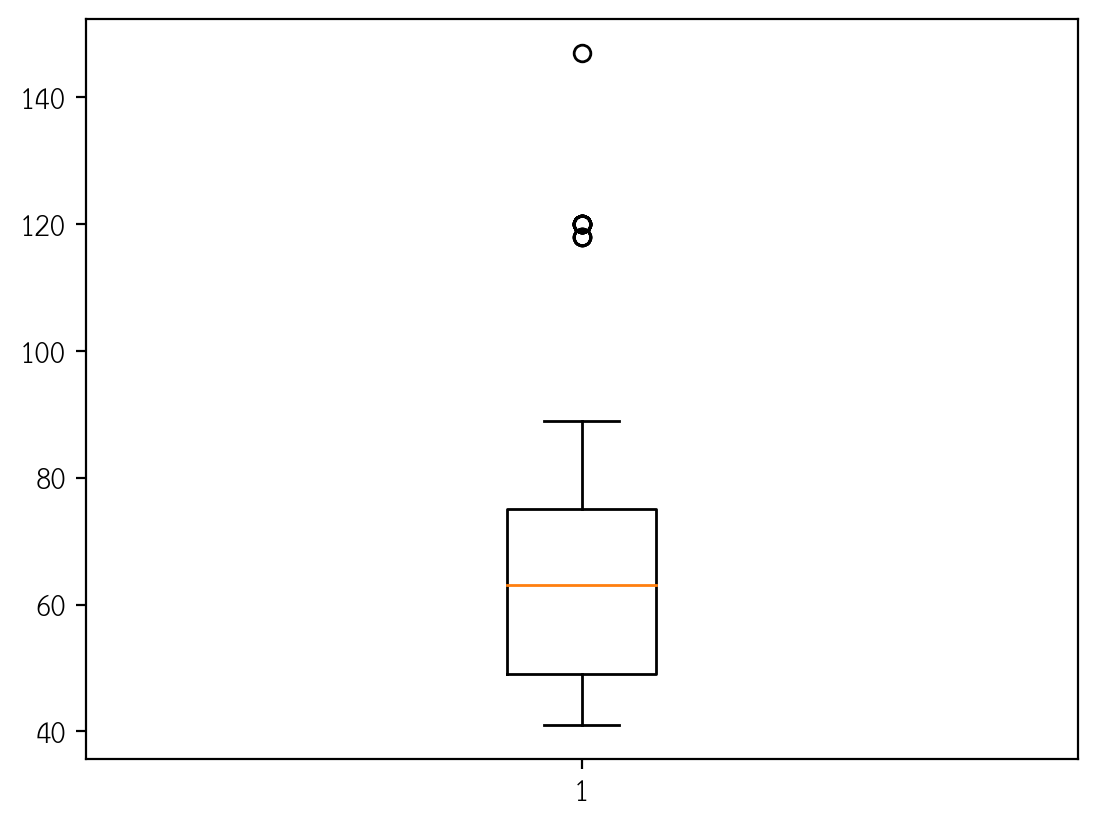

In [ ]:

plt.boxplot(data['Weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e3df521cd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7e3df521d2d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e3df521caf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e3df521d810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e3df521dab0>],
 'means': []}

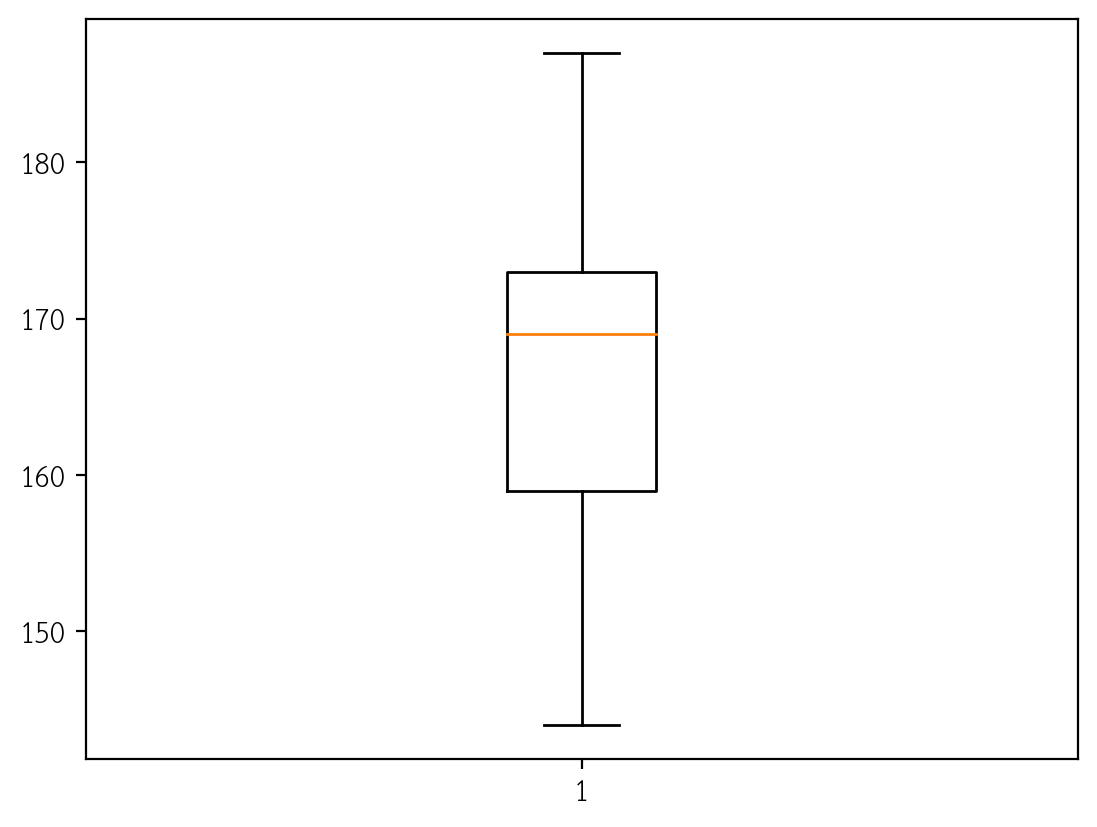

In [ ]:
plt.boxplot(data['Height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e3df526e800>,
 'caps': [<matplotlib.lines.Line2D at 0x7e3df526ed40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e3df526e560>],
 'medians': [<matplotlib.lines.Line2D at 0x7e3df526f280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e3df526f520>],
 'means': []}

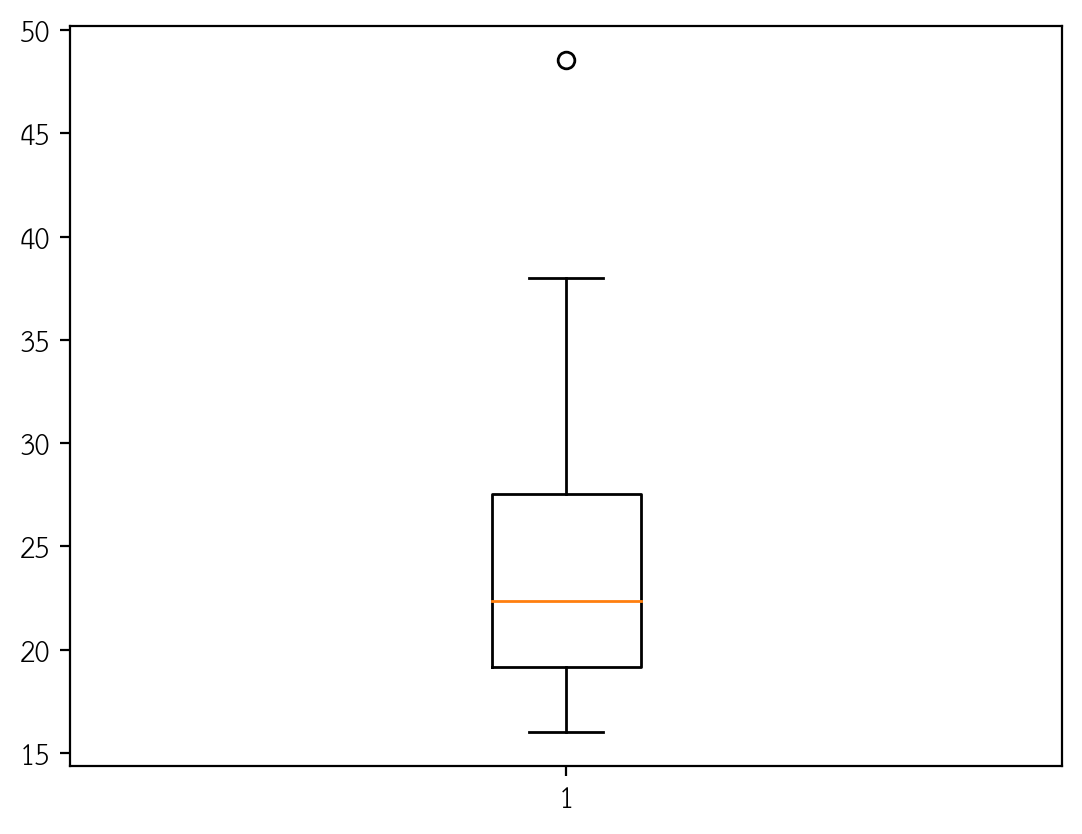

In [ ]:
plt.boxplot(data['BMI'])

#เพิ่มคอลัมน์ค่า TMRT clo และ met ตามลำดับ

In [ ]:
data["TMRT"] = data['ยกกำลัง 1 ส่วน 4/ 0.25'] - data['ลบ 273.15']
data["Clo"] = 0.55
data["Met"] =  1.2
data

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,2,0,-1,0,-1,0,30.628551,0.55,1.2
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,1,0,0,1,-1,0,30.628551,0.55,1.2
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,1,0,0,0,0,0,30.628551,0.55,1.2
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,4,2,-1,0,0,-1,1,30.628551,0.55,1.2
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,-1,-1,0,-1,0,30.628551,0.55,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,-1,1,0,-1,-1,36.559615,0.55,1.2
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,4,-1,1,1,-1,-1,36.559615,0.55,1.2
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,5,3,-1,-1,1,-1,-1,36.559615,0.55,1.2
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,0,3,-1,1,1,-1,-1,36.559615,0.55,1.2


In [ ]:
data.describe()

,No,Age,Weight,Height,BMI,Temp,Globe temp,RH,V,วงเล็บ 1,...,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,1.930000e+02
mean,97.000000,30.720207,68.538860,167.331606,24.364511,30.895337,31.533161,48.780829,0.265311,8.621030e+09,...,2.207254,2.129534,-0.647668,-0.103627,0.637306,-0.419689,-0.450777,31.777293,5.500000e-01,1.200000e+00
std,55.858452,11.950177,22.290455,9.716496,7.089200,2.310264,2.432899,7.491418,0.285395,2.756796e+08,...,2.010014,1.941544,0.510522,0.558679,0.543002,0.554363,0.558002,2.489153,1.113110e-16,2.226221e-16
min,1.000000,20.000000,41.000000,144.000000,16.015625,27.200000,27.600000,38.100000,0.045000,8.181304e+09,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,27.730857,5.500000e-01,1.200000e+00
25%,49.000000,25.000000,49.000000,159.000000,19.146722,29.100000,29.800000,42.500000,0.120000,8.423330e+09,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,30.211258,5.500000e-01,1.200000e+00
50%,97.000000,27.000000,63.000000,169.000000,22.343516,30.800000,31.800000,46.600000,0.185000,8.647977e+09,...,2.000000,2.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,31.939186,5.500000e-01,1.200000e+00
75%,145.000000,36.000000,75.000000,173.000000,27.548209,32.700000,33.100000,56.100000,0.330000,8.796388e+09,...,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,33.219269,5.500000e-01,1.200000e+00
max,193.000000,70.000000,147.000000,187.000000,48.553310,35.600000,36.200000,64.200000,1.765000,9.157997e+09,...,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.559615,5.500000e-01,1.200000e+00


##drop คอลัมน์ -3 ถึง 3 และคอลัมน์สูตรในการคำนวณหา TMRT ออก

In [ ]:
data.drop([-3, -2, -1, 0, '+1', '+2', '+3'], axis=1, inplace=True)

In [ ]:

data.drop(['วงเล็บ 1', 'สมการหลัง บวก', 'วงเล็บ 2','ยกกำลัง 1 ส่วน 4/ 0.25', 'ลบ 273.15'  ], axis=1, inplace=True)

In [ ]:
data.shape

(193, 28)

In [ ]:
data.columns

Index(['No', 'Date', 'เพศ', 'Age', 'Weight', 'Height', 'BMI',
       'พื้นที่ทำแบบสอบถาม', 'เวลา', 'Temp', 'Globe temp', 'RH', 'V',
       'Thermal_acceptance', 'Thermal_sensation_Vote', 'อุณหภูมิ', 'ความชื้น',
       'กระแสลม', 'ความแรงของแสงแดด', 'เหงื่อบริเวณผิวหนัง', 'ความร้อน',
       'ความชื้น.1', 'กระแสลม.1', 'แสงแดด', 'เหงื่อบริเวณผิวหนัง.1', 'TMRT',
       'Clo', 'Met'],
      dtype='object')

##แทนค่าลักษณะของคำที่เหมือนกัน

In [ ]:
set(data['พื้นที่ทำแบบสอบถาม'])

{'ภายนอก / ใต้ร่มไม้',
 'ภายนอก กลางแจ้ง',
 'ภายนอก/ กลางแจ้ง',
 'ภายนอก/ มีหลังคาคลุม',
 'ภายใต้ร่มไม้',
 'ภายใต้อาคาร'}

In [ ]:
data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายใต้ร่มไม้'] = 'ภายนอก / ใต้ร่มไม้'
data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายนอก กลางแจ้ง'] = 'ภายนอก/ กลางแจ้ง'

<ipython-input-29-daf20139a280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายใต้ร่มไม้'] = 'ภายนอก / ใต้ร่มไม้'
<ipython-input-29-daf20139a280>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายนอก กลางแจ้ง'] = 'ภายนอก/ กลางแจ้ง'


In [ ]:
set(data['พื้นที่ทำแบบสอบถาม'])

{'ภายนอก / ใต้ร่มไม้',
 'ภายนอก/ กลางแจ้ง',
 'ภายนอก/ มีหลังคาคลุม',
 'ภายใต้อาคาร'}

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      193 non-null    int64  
 1   Date                    193 non-null    object 
 2   เพศ                     193 non-null    object 
 3   Age                     193 non-null    int64  
 4   Weight                  193 non-null    float64
 5   Height                  193 non-null    float64
 6   BMI                     193 non-null    float64
 7   พื้นที่ทำแบบสอบถาม      193 non-null    object 
 8   เวลา                    193 non-null    object 
 9   Temp                    193 non-null    float64
 10  Globe temp              193 non-null    float64
 11  RH                      193 non-null    float64
 12  V                       193 non-null    float64
 13  Thermal_acceptance      193 non-null    object 
 14  Thermal_sensation_Vote  193 non-null    in

##เปลี่ยนวันที่เป็น datetime

In [ ]:
set(data['Date'])

{'13/05/2023',
 datetime.datetime(2022, 12, 28, 0, 0),
 datetime.datetime(2023, 1, 6, 0, 0),
 datetime.datetime(2023, 1, 8, 0, 0)}

In [ ]:
data['Date'] = pd.to_datetime(data.Date)

<ipython-input-33-2e81f6b9fef3>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data.Date)


In [ ]:
set(data['Date'])

{Timestamp('2022-12-28 00:00:00'),
 Timestamp('2023-01-06 00:00:00'),
 Timestamp('2023-01-08 00:00:00'),
 Timestamp('2023-05-13 00:00:00')}

In [ ]:
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
conditions = [
    data.Date.dt.month.isin(np.arange(5,10)),
    (data.Date.dt.month.isin(np.arange(1,5))) | (data.Date.dt.month.isin(np.arange(10,13))),
]
choices = ['summer','winter']
data['seasons'] = np.select(conditions, choices)
data

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met,seasons
0,1,2022-12-28,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,-1,0,-1,0,30.628551,0.55,1.2,winter
1,2,2022-12-28,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,0,0,1,-1,0,30.628551,0.55,1.2,winter
2,3,2022-12-28,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,0,0,0,0,0,30.628551,0.55,1.2,winter
3,4,2022-12-28,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,-1,0,0,-1,1,30.628551,0.55,1.2,winter
4,5,2022-12-28,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,0,-1,-1,0,-1,0,30.628551,0.55,1.2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,2023-05-13,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,2,-1,1,0,-1,-1,36.559615,0.55,1.2,summer
189,190,2023-05-13,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,4,-1,1,1,-1,-1,36.559615,0.55,1.2,summer
190,191,2023-05-13,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,3,-1,-1,1,-1,-1,36.559615,0.55,1.2,summer
191,192,2023-05-13,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,-1,1,1,-1,-1,36.559615,0.55,1.2,summer


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   No                      193 non-null    int64         
 1   Date                    193 non-null    datetime64[ns]
 2   เพศ                     193 non-null    object        
 3   Age                     193 non-null    int64         
 4   Weight                  193 non-null    float64       
 5   Height                  193 non-null    float64       
 6   BMI                     193 non-null    float64       
 7   พื้นที่ทำแบบสอบถาม      193 non-null    object        
 8   เวลา                    193 non-null    object        
 9   Temp                    193 non-null    float64       
 10  Globe temp              193 non-null    float64       
 11  RH                      193 non-null    float64       
 12  V                       193 non-null    float64   

#Visualization

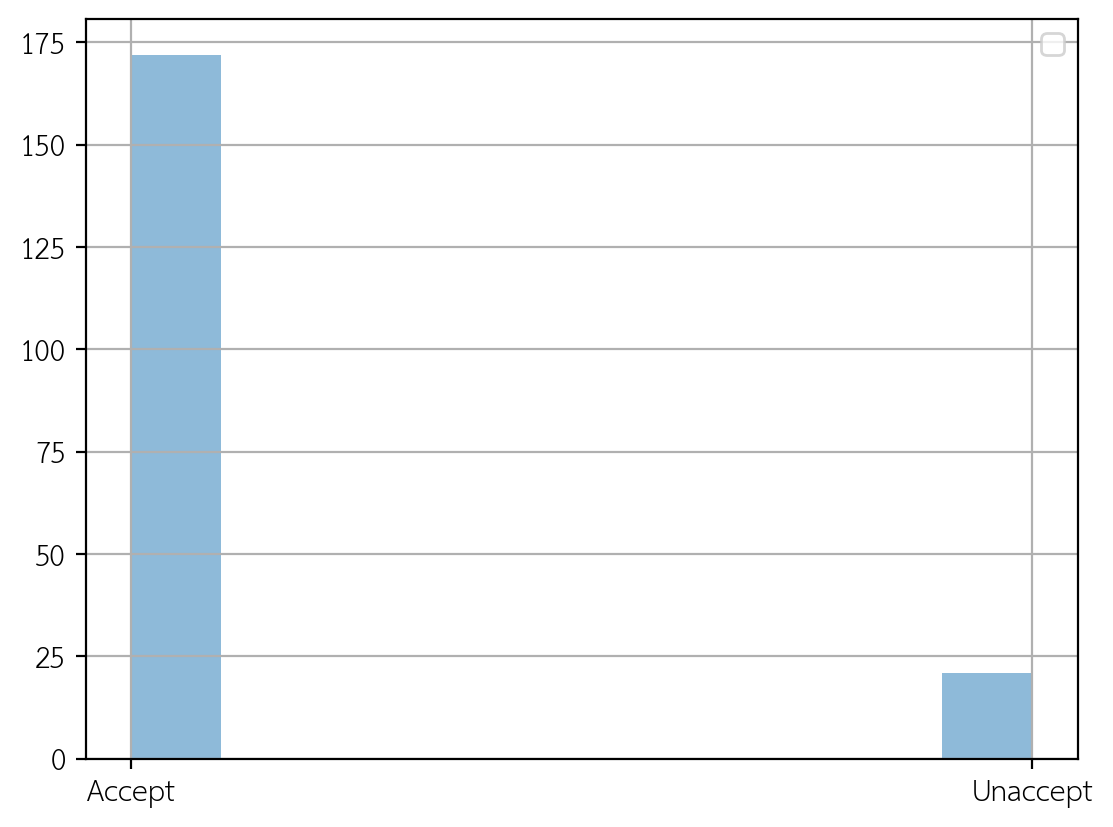

In [ ]:

data['Thermal_acceptance'].hist( alpha=0.5)
plt.legend(loc='upper right')

In [ ]:
data.groupby('พื้นที่ทำแบบสอบถาม').mean()

<ipython-input-40-bbc1fd0e3090>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('พื้นที่ทำแบบสอบถาม').mean()


,No,Age,Weight,Height,BMI,Temp,Globe temp,%RH,V (m/s),Thermal_sensation_Vote,...,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met
พื้นที่ทำแบบสอบถาม,,,,,,,,,,,,,,,,,,,,,
ภายนอก / ใต้ร่มไม้,138.733333,30.866667,60.333333,163.066667,22.858977,32.100000,32.646667,50.213333,0.240667,1.133333,...,3.000000,3.600000,-0.666667,-0.200000,0.800000,-0.600000,-0.533333,32.893306,0.55,1.2
ภายนอก/ กลางแจ้ง,101.888889,25.777778,67.888889,169.777778,23.445335,31.250000,31.544444,47.188889,0.215278,0.944444,...,2.611111,2.666667,-0.611111,0.111111,0.666667,-0.388889,-0.555556,31.683922,0.55,1.2
ภายนอก/ มีหลังคาคลุม,61.046729,26.364486,72.364486,169.364486,25.157033,29.472897,30.287850,44.204673,0.280280,0.074766,...,1.299065,1.168224,-0.579439,-0.158879,0.607477,-0.271028,-0.289720,30.595772,0.55,1.2
ภายใต้อาคาร,156.113208,41.150943,62.075472,160.452830,23.502782,33.305660,33.728302,58.154717,0.259057,1.056604,...,3.679245,3.471698,-0.792453,-0.037736,0.641509,-0.679245,-0.716981,33.878483,0.55,1.2


In [ ]:
data33 = data.groupby('พื้นที่ทำแบบสอบถาม').mean().reset_index()[['พื้นที่ทำแบบสอบถาม','Thermal_acceptance']]
data33.sort_values(by=['Thermal_acceptance'])

<ipython-input-41-5551bfbdc11c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data33 = data.groupby('พื้นที่ทำแบบสอบถาม').mean().reset_index()[['พื้นที่ทำแบบสอบถาม','Thermal_acceptance']]


KeyError: ignored

<Axes: xlabel='Thermal_acceptance', ylabel='Count'>

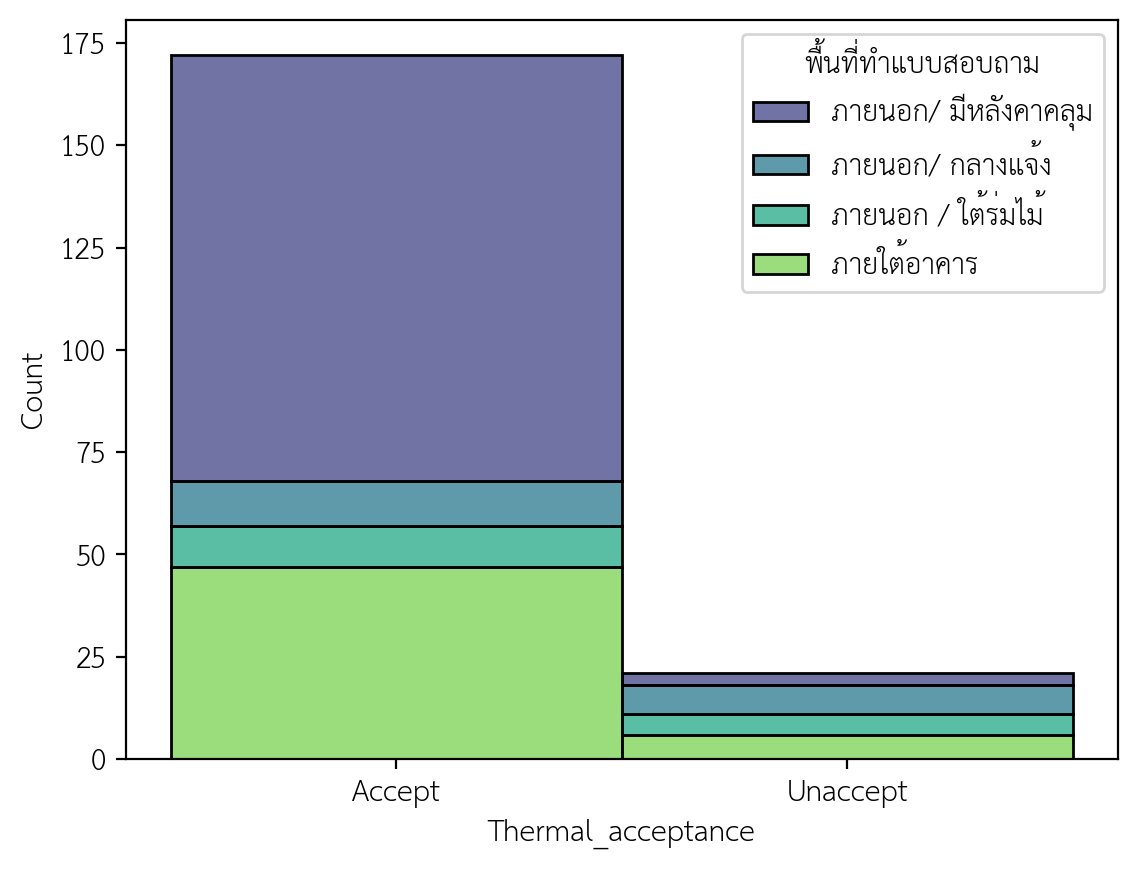

In [ ]:
sns.histplot(data=data, x="Thermal_acceptance", hue="พื้นที่ทำแบบสอบถาม", multiple="stack", palette="viridis")

<Axes: xlabel='Temp', ylabel='Count'>

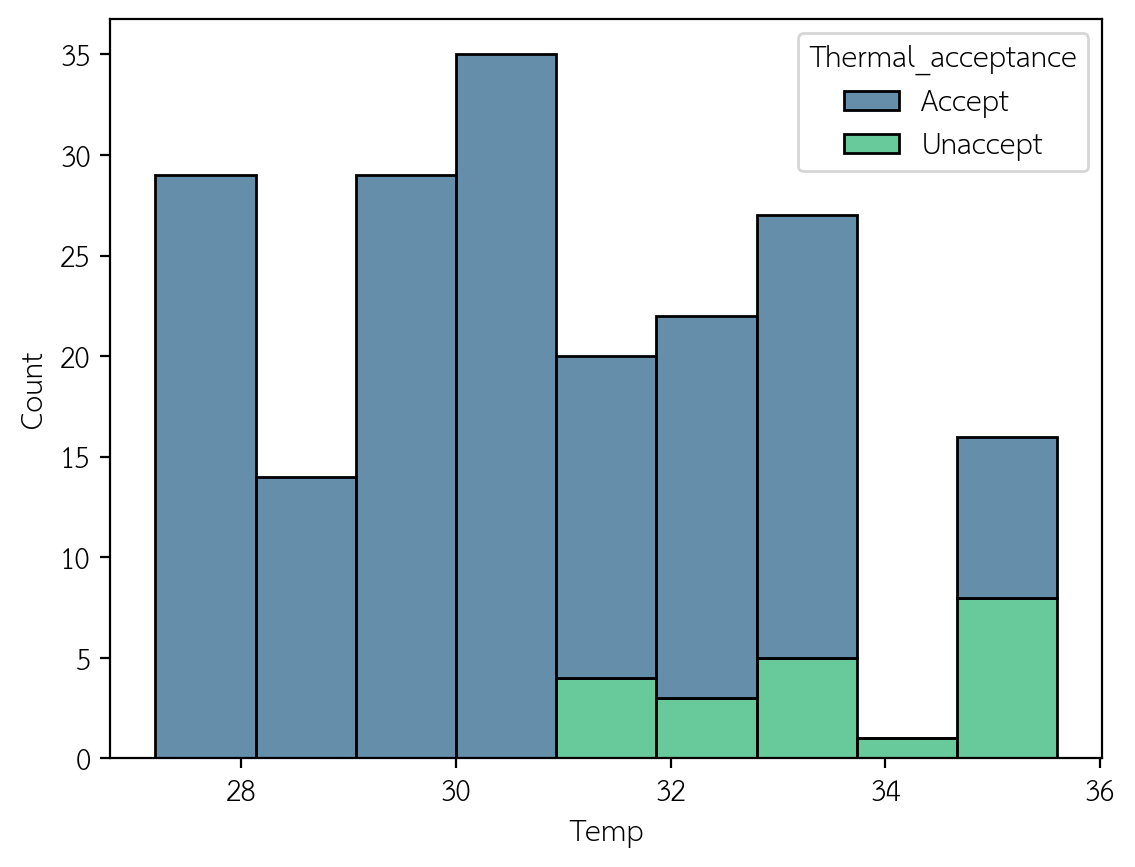

In [ ]:
sns.histplot(data=data, x="Temp", hue="Thermal_acceptance", multiple="stack", palette="viridis")

<Axes: xlabel='V (m/s)', ylabel='Count'>

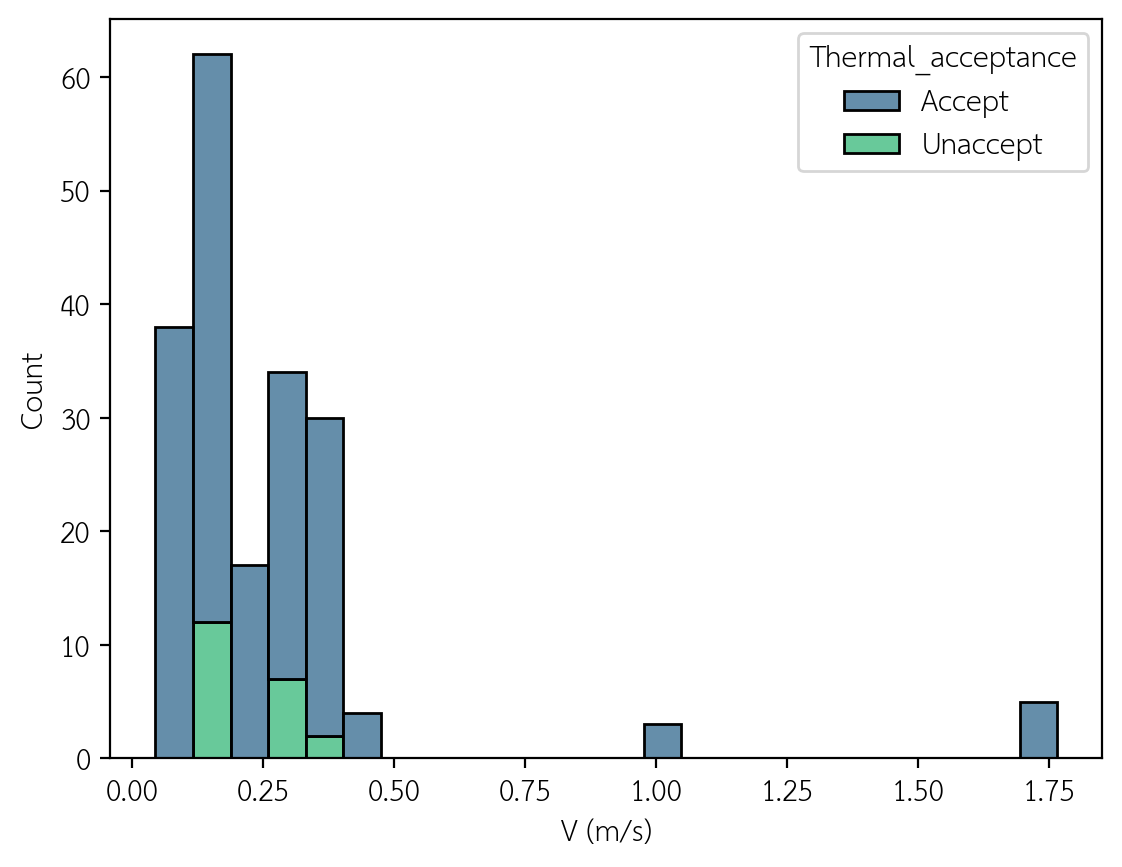

In [ ]:
sns.histplot(data=data, x="V (m/s)", hue="Thermal_acceptance", multiple="stack", palette="viridis")

<Axes: xlabel='%RH', ylabel='Count'>

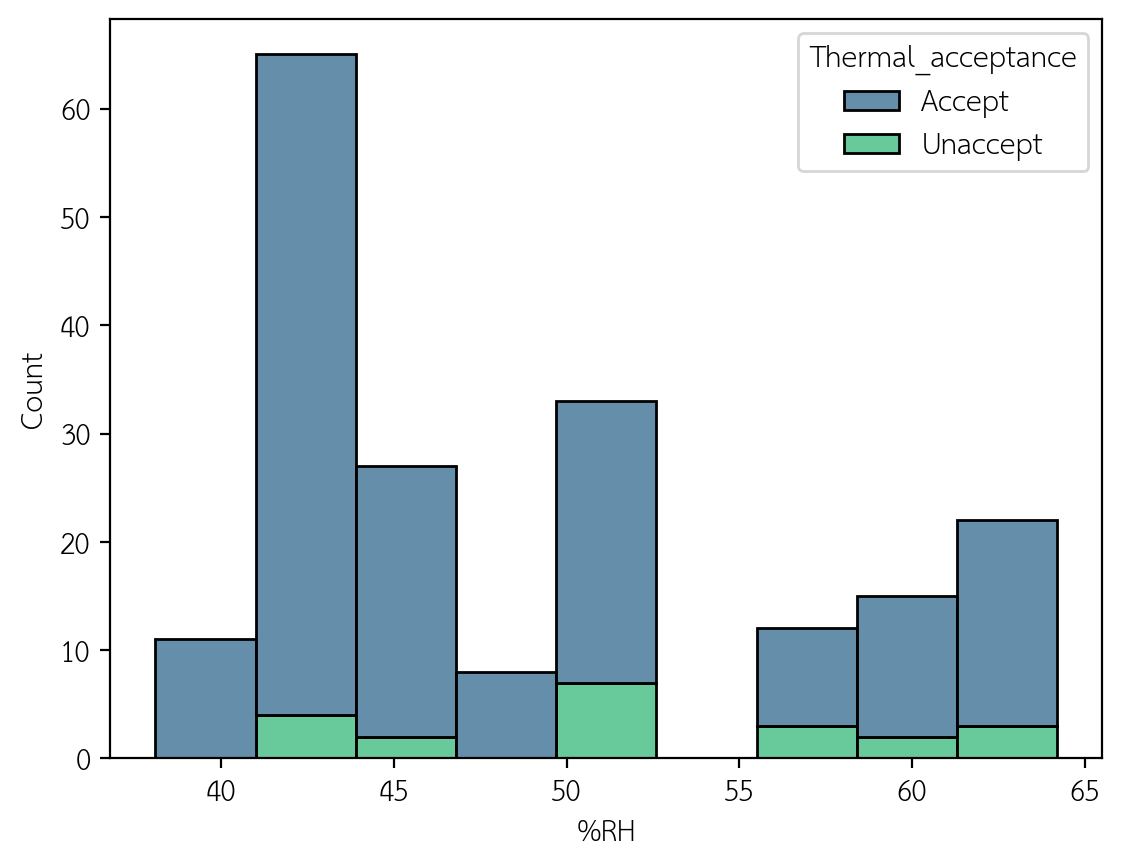

In [ ]:
sns.histplot(data=data, x="%RH", hue="Thermal_acceptance", multiple="stack", palette="viridis")

<Axes: xlabel='TMRT', ylabel='Count'>

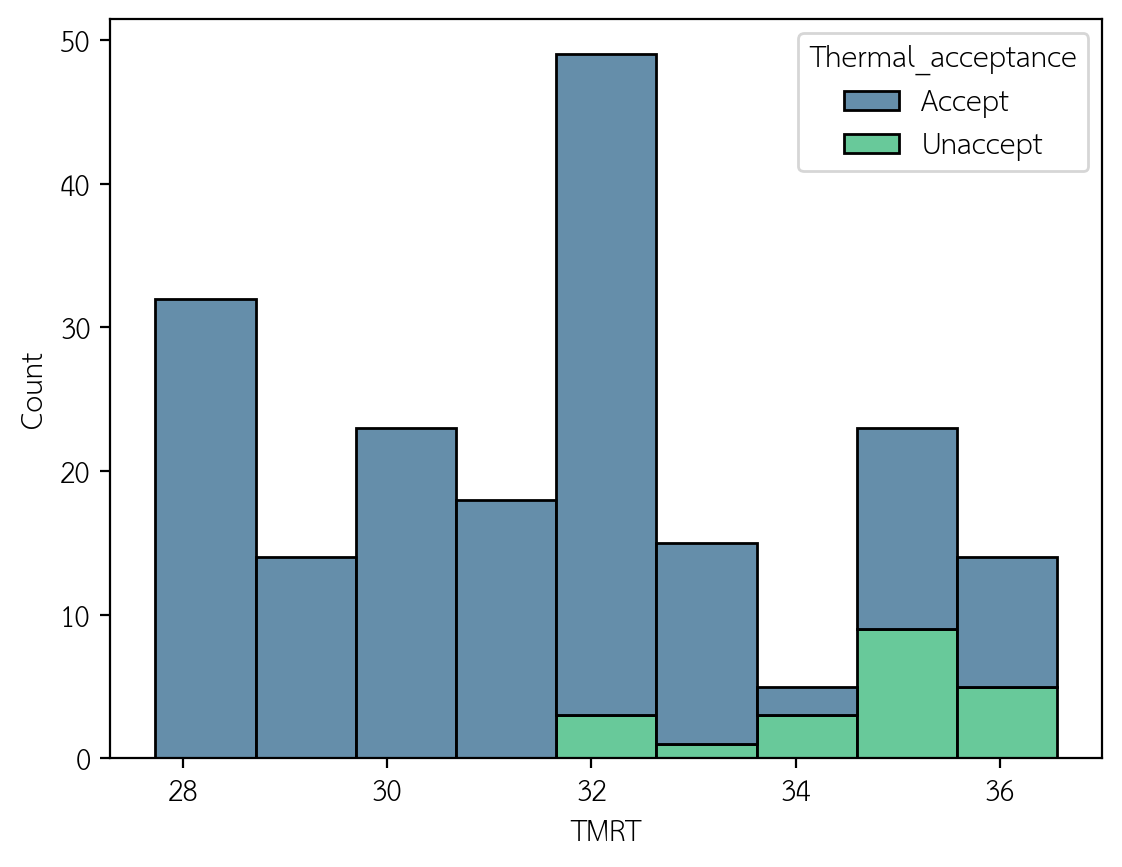

In [ ]:
sns.histplot(data=data, x="TMRT", hue="Thermal_acceptance", multiple="stack", palette="viridis")

<Axes: xlabel='seasons', ylabel='Count'>

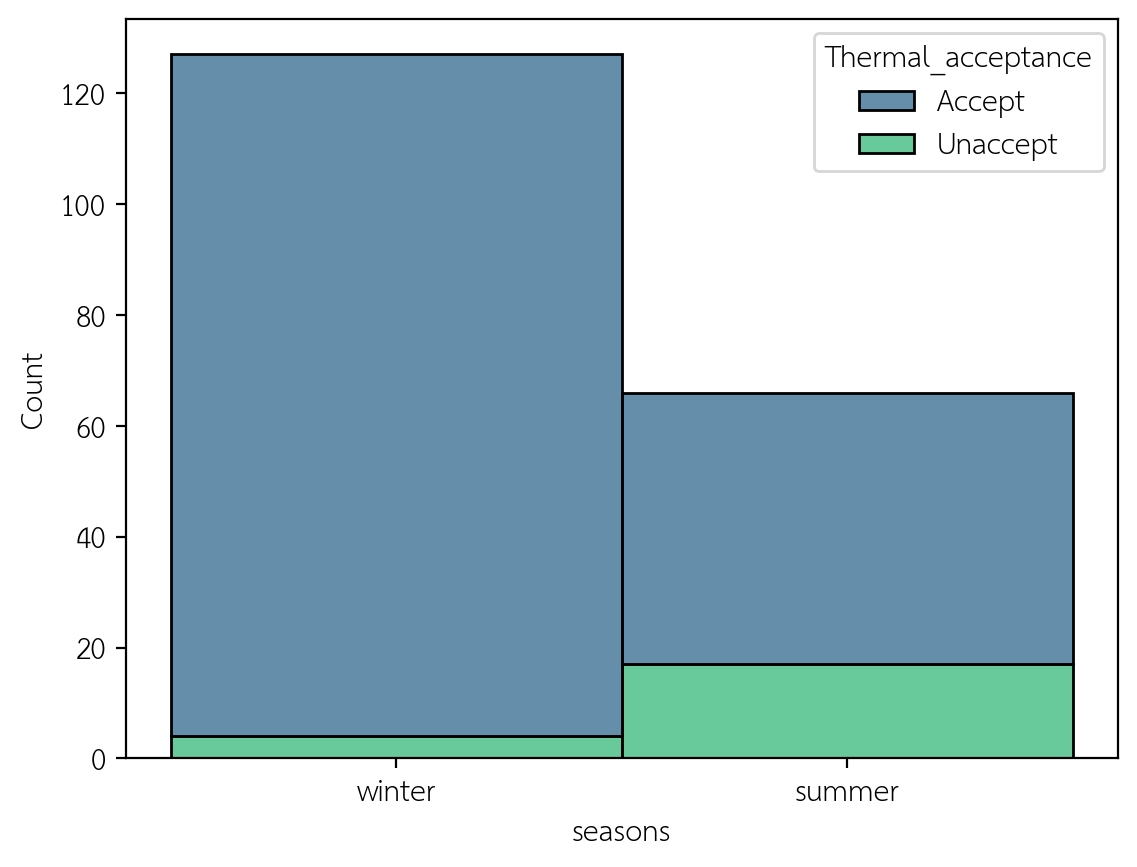

In [ ]:
sns.histplot(data=data, x="seasons", hue="Thermal_acceptance", multiple="stack", palette="viridis")

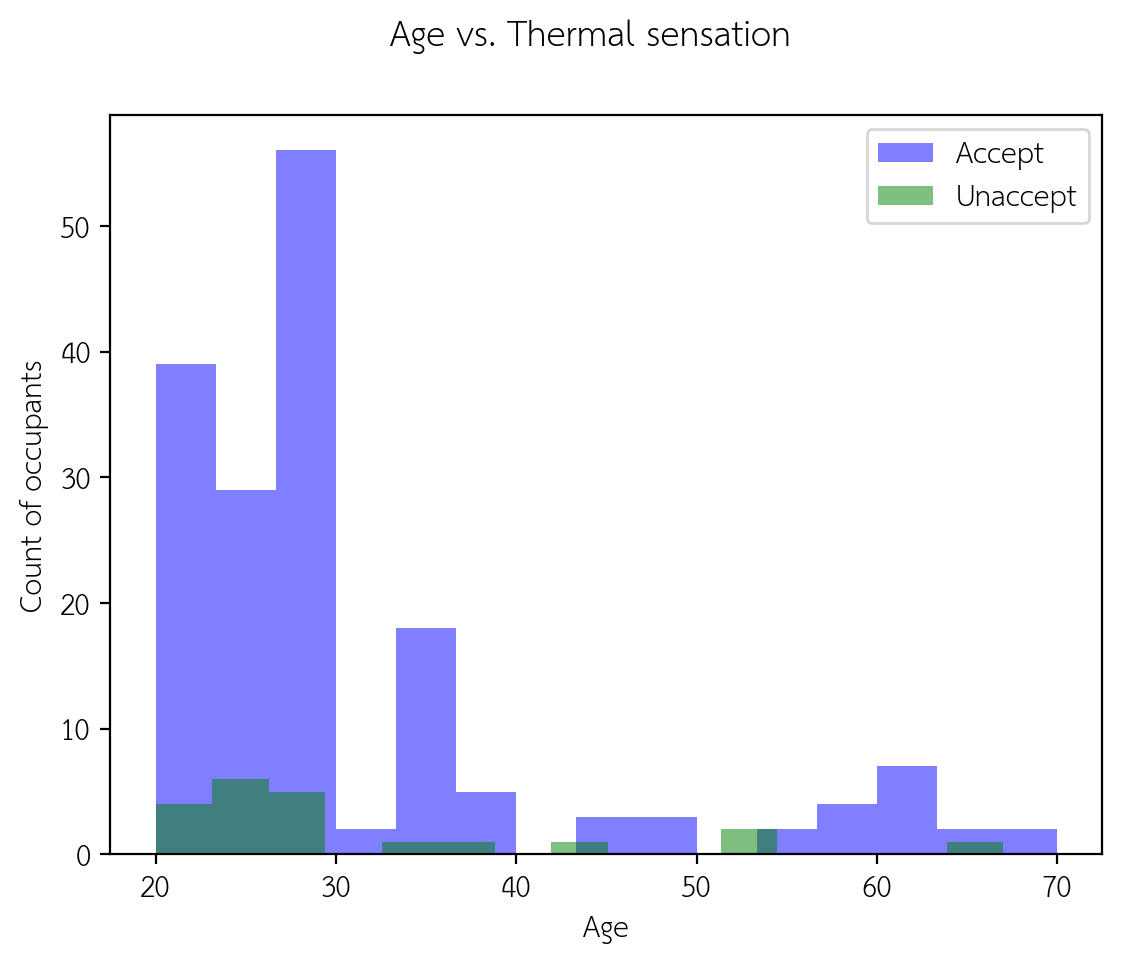

In [ ]:
fig, ax = plt.subplots()

ax.hist(data[data["Thermal_acceptance"]=="Accept"]["Age"], bins=15, alpha=0.5, color="blue", label="Accept")
ax.hist(data[data["Thermal_acceptance"]=="Unaccept"]["Age"], bins=15, alpha=0.5, color="green", label="Unaccept")

ax.set_xlabel("Age")
ax.set_ylabel("Count of occupants")

fig.suptitle("Age vs. Thermal sensation")

ax.legend();


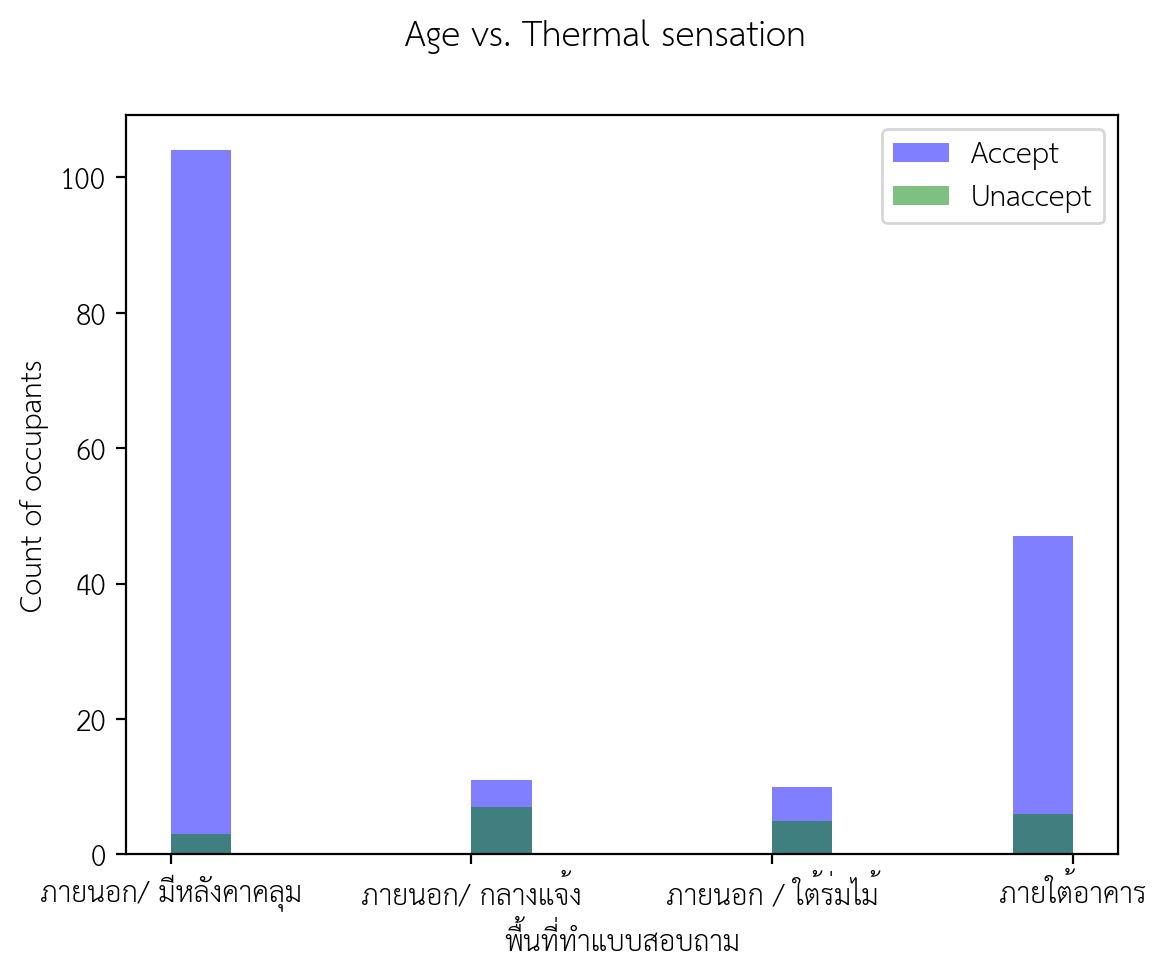

In [ ]:
fig, ax = plt.subplots()

ax.hist(data[data["Thermal_acceptance"]=="Accept"]["พื้นที่ทำแบบสอบถาม"], bins=15, alpha=0.5, color="blue", label="Accept")
ax.hist(data[data["Thermal_acceptance"]=="Unaccept"]["พื้นที่ทำแบบสอบถาม"], bins=15, alpha=0.5, color="green", label="Unaccept")

ax.set_xlabel("พื้นที่ทำแบบสอบถาม")
ax.set_ylabel("Count of occupants")

fig.suptitle("พื้นที่ทำแบบสอบถาม vs. Thermal sensation")

ax.legend();


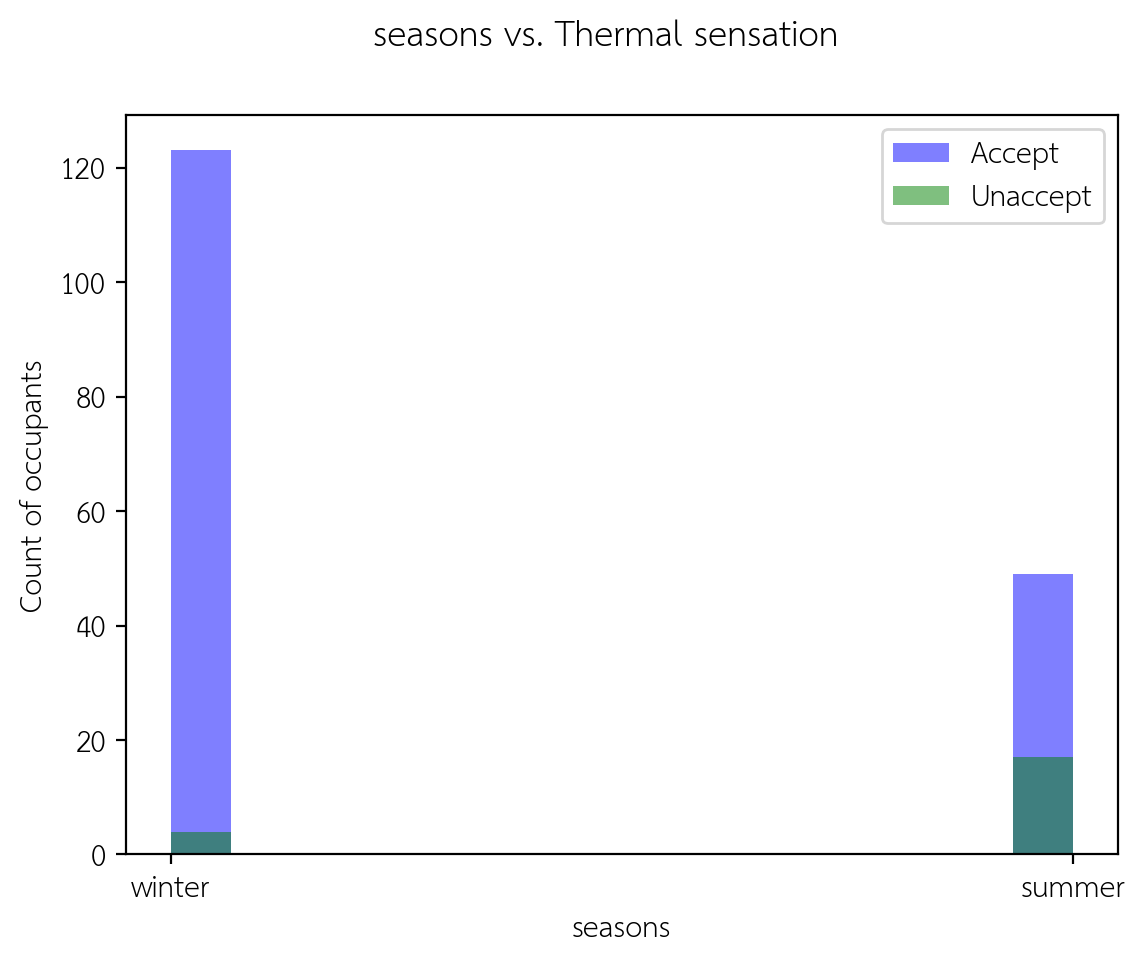

In [ ]:
fig, ax = plt.subplots()

ax.hist(data[data["Thermal_acceptance"]=="Accept"]["seasons"], bins=15, alpha=0.5, color="blue", label="Accept")
ax.hist(data[data["Thermal_acceptance"]=="Unaccept"]["seasons"], bins=15, alpha=0.5, color="green", label="Unaccept")

ax.set_xlabel("seasons")
ax.set_ylabel("Count of occupants")

fig.suptitle("seasons vs. Thermal sensation")

ax.legend();

TypeError: ignored

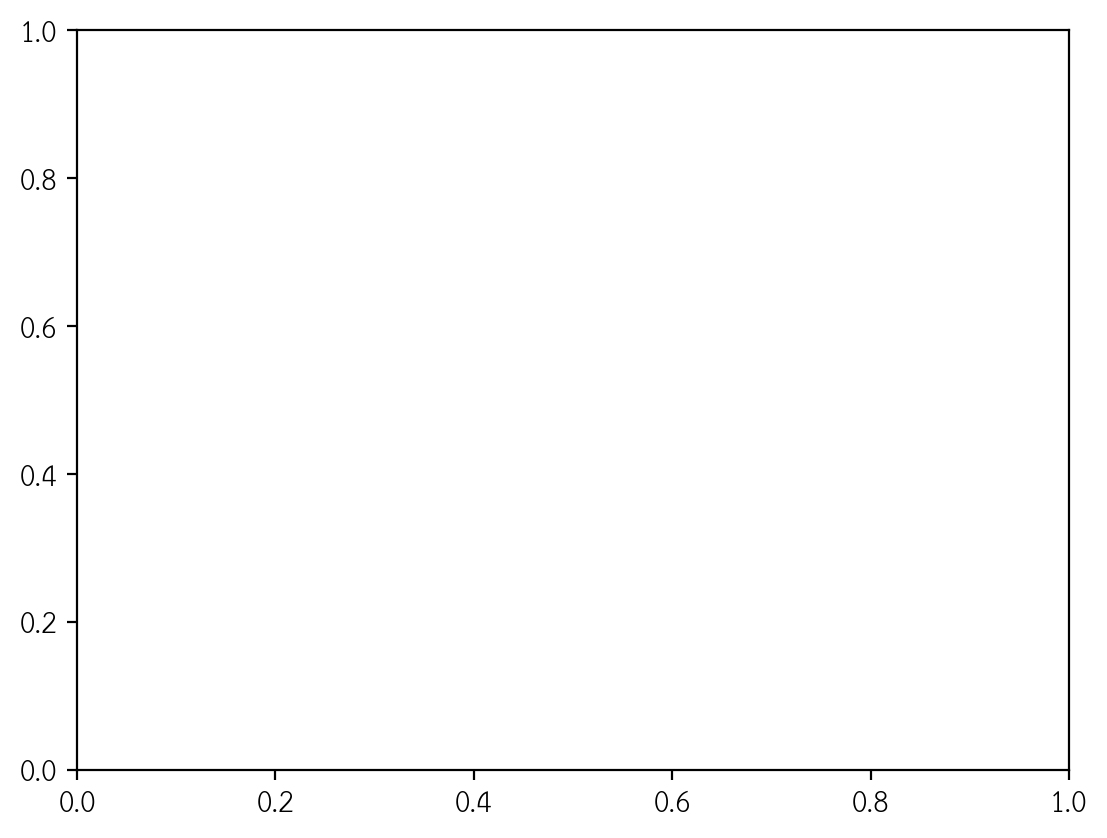

In [ ]:
fig, ax = plt.subplots()

sns.catplot("Thermal_acceptance", hue="พื้นที่ทำแบบสอบถาม", data=data, kind="count",
            palette={1:"yellow", 2:"orange", 3:"red"}, ax=ax)

plt.close(2) # catplot creates an extra figure we don't need

ax.legend(title="พื้นที่ทำแบบสอบถาม")
ax.set_xticklabels(["Accept", "Unacceot"])
ax.set_xlabel("")

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

In [ ]:
data.corr()

<ipython-input-96-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,No,Age,Weight,Height,BMI,Temp,Globe temp,%RH,V (m/s),Thermal_sensation_Vote,...,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met
No,1.000000,0.374334,-0.241171,-0.174482,-0.181233,0.795272,0.727556,0.572413,-0.062186,0.546787,...,0.503362,0.597857,-0.269759,0.116327,0.233704,-0.257172,-0.367284,0.694301,NaN,NaN
Age,0.374334,1.000000,-0.105589,-0.275346,-0.000254,0.430778,0.362495,0.465773,-0.014375,0.140879,...,0.402917,0.349738,-0.054615,0.022939,-0.000470,-0.176629,-0.133049,0.338733,NaN,NaN
Weight,-0.241171,-0.105589,1.000000,0.435064,0.880957,-0.168054,-0.170185,-0.213391,0.014632,-0.134578,...,-0.201969,-0.122986,0.207488,-0.054421,-0.048712,0.088112,-0.111113,-0.165977,NaN,NaN
Height,-0.174482,-0.275346,0.435064,1.000000,0.013429,-0.181934,-0.179363,-0.283608,0.033187,-0.039883,...,-0.162525,-0.108627,0.007443,-0.070888,-0.038649,0.002290,0.037135,-0.173161,NaN,NaN
BMI,-0.181233,-0.000254,0.880957,0.013429,1.000000,-0.095135,-0.091908,-0.097345,-0.000359,-0.147886,...,-0.141337,-0.098333,0.256826,-0.008517,-0.034317,0.078835,-0.124111,-0.089091,NaN,NaN
Temp,0.795272,0.430778,-0.168054,-0.181934,-0.095135,1.000000,0.945751,0.421476,-0.207553,0.635272,...,0.708836,0.741997,-0.324496,-0.004008,0.163056,-0.500927,-0.400809,0.911245,NaN,NaN
Globe temp,0.727556,0.362495,-0.170185,-0.179363,-0.091908,0.945751,1.000000,0.320776,-0.238458,0.641370,...,0.734333,0.723730,-0.351213,-0.022366,0.144774,-0.554210,-0.436655,0.993875,NaN,NaN
%RH,0.572413,0.465773,-0.213391,-0.283608,-0.097345,0.421476,0.320776,1.000000,0.023862,0.235223,...,0.425189,0.399509,-0.109622,0.079167,0.052697,-0.238224,-0.232827,0.279872,NaN,NaN
V (m/s),-0.062186,-0.014375,0.014632,0.033187,-0.000359,-0.207553,-0.238458,0.023862,1.000000,-0.237052,...,-0.167535,-0.163483,0.082892,0.055898,-0.233521,0.138598,0.075616,-0.189957,NaN,NaN
Thermal_sensation_Vote,0.546787,0.140879,-0.134578,-0.039883,-0.147886,0.635272,0.641370,0.235223,-0.237052,1.000000,...,0.663216,0.753405,-0.477354,-0.059481,0.238285,-0.419292,-0.469345,0.622735,NaN,NaN


<ipython-input-97-6065616750f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dcorr = data.corr()


<Axes: >

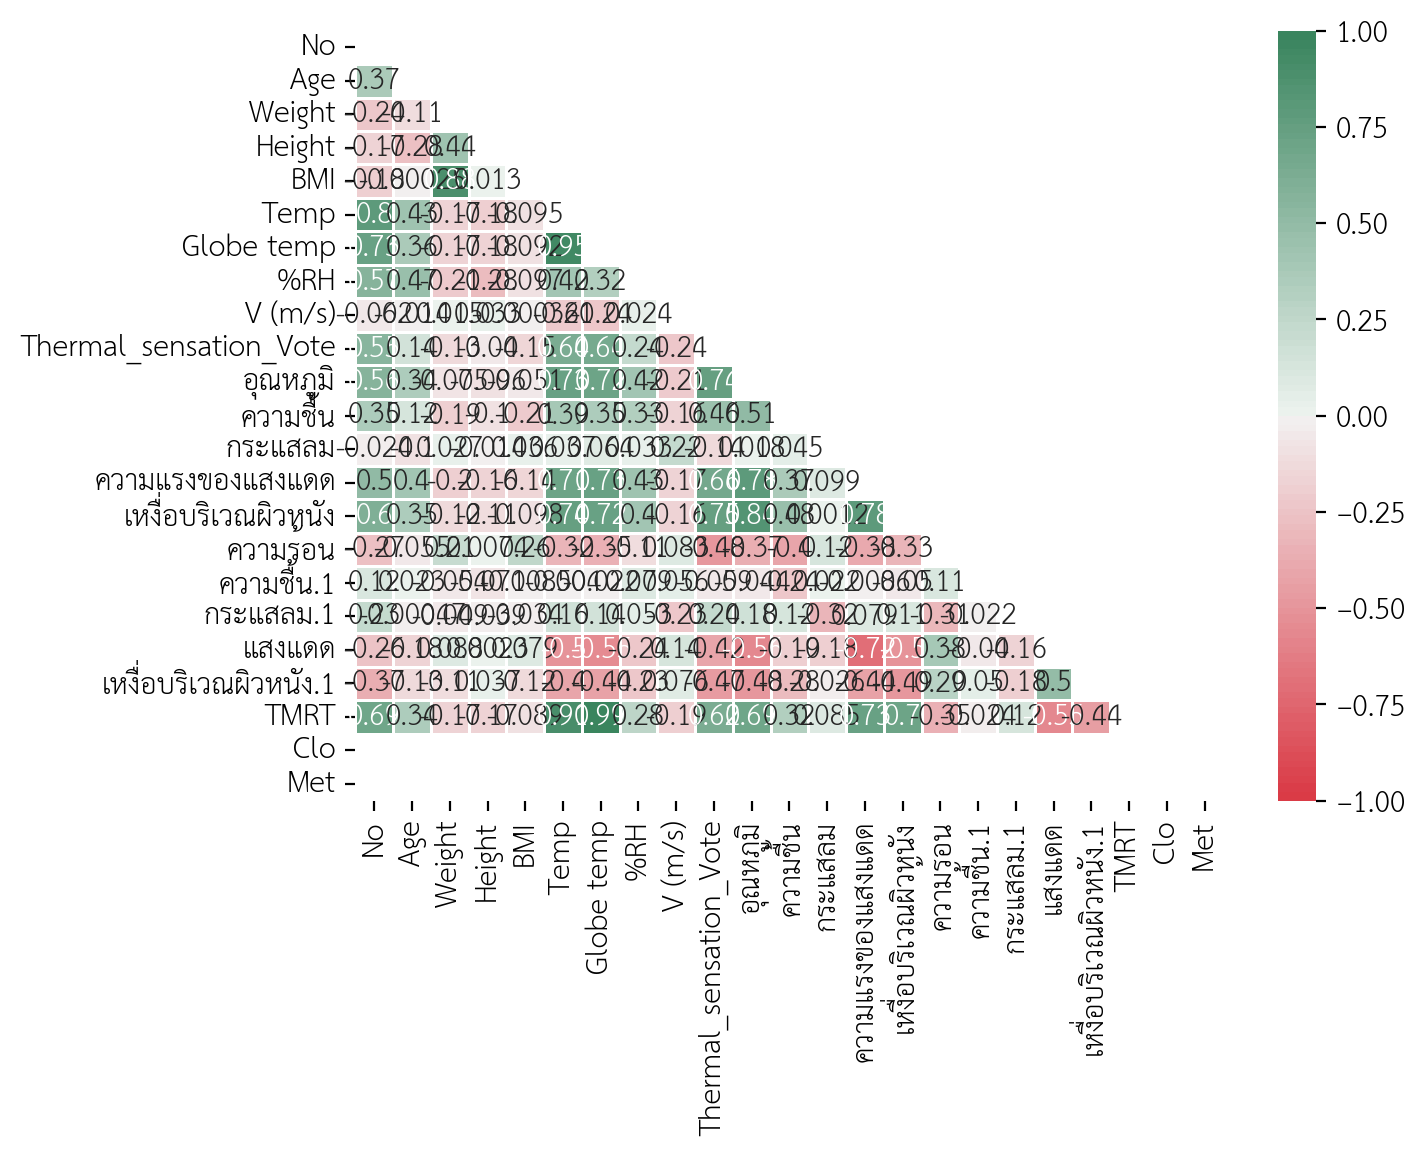

In [ ]:
from numpy.core.numeric import zeros_like
dcorr = data.corr()
mask = np.zeros_like(dcorr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (7,5))
sns.heatmap(dcorr, cmap=sns.diverging_palette(10, 145, n=100),
            vmin=-1, vmax=1, center=0, linewidths=1, annot=True , mask=mask, ax=ax)





#histogram
##ของตัวแปร อายุ น้ำหนัก ส่วนสูง ค่า bmi อุณหภูมิ ความชื้นสัมพัทธ์ ความเร็วลม และTMRT

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

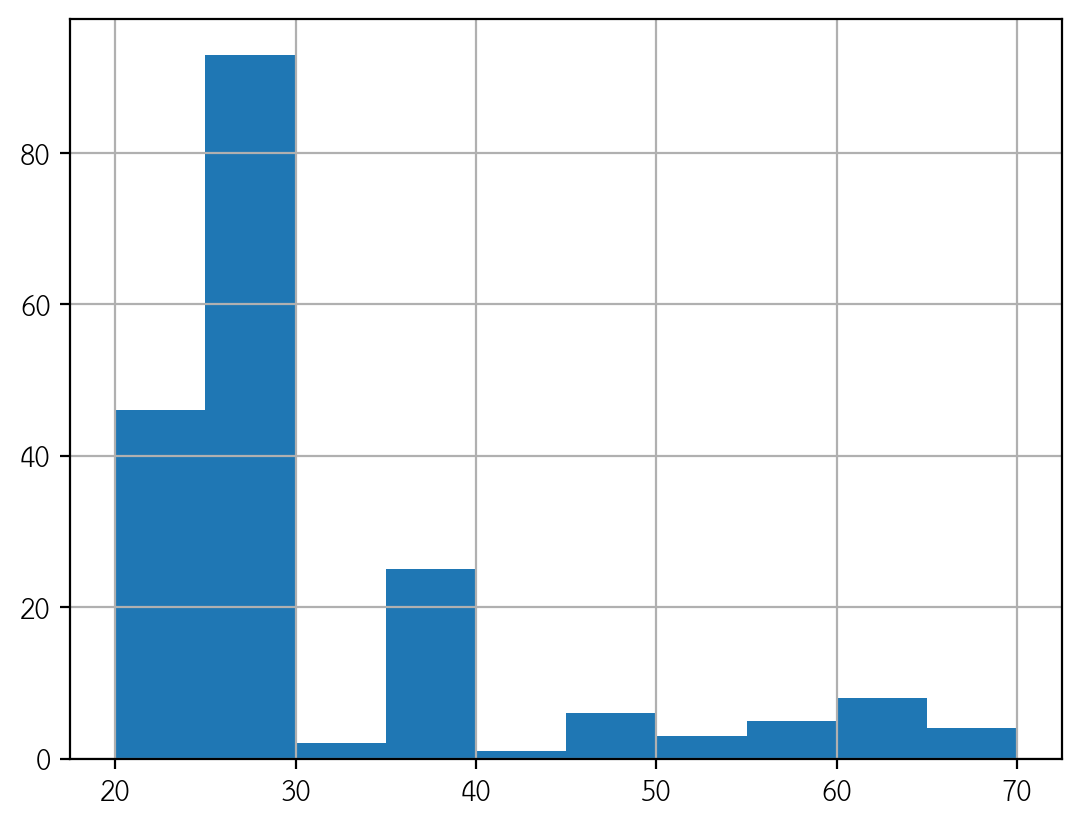

In [74]:
data.Age.hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

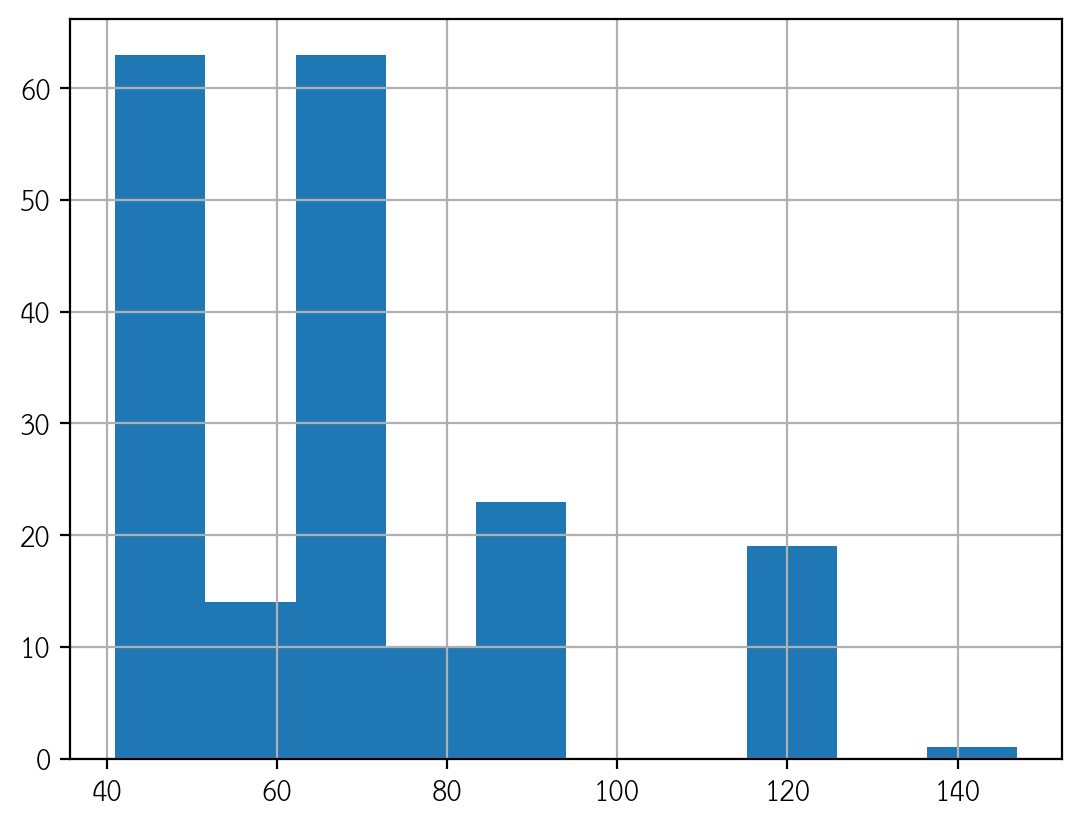

In [71]:
data.Weight.hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

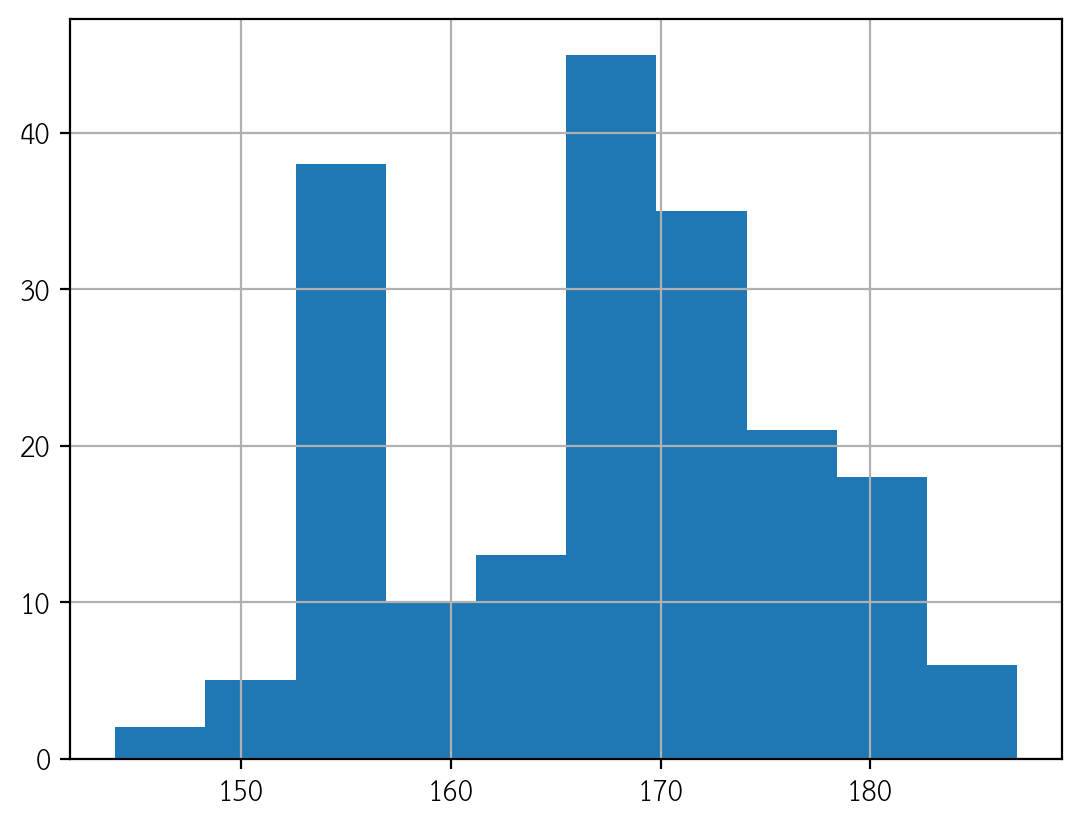

In [72]:
data.Height.hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

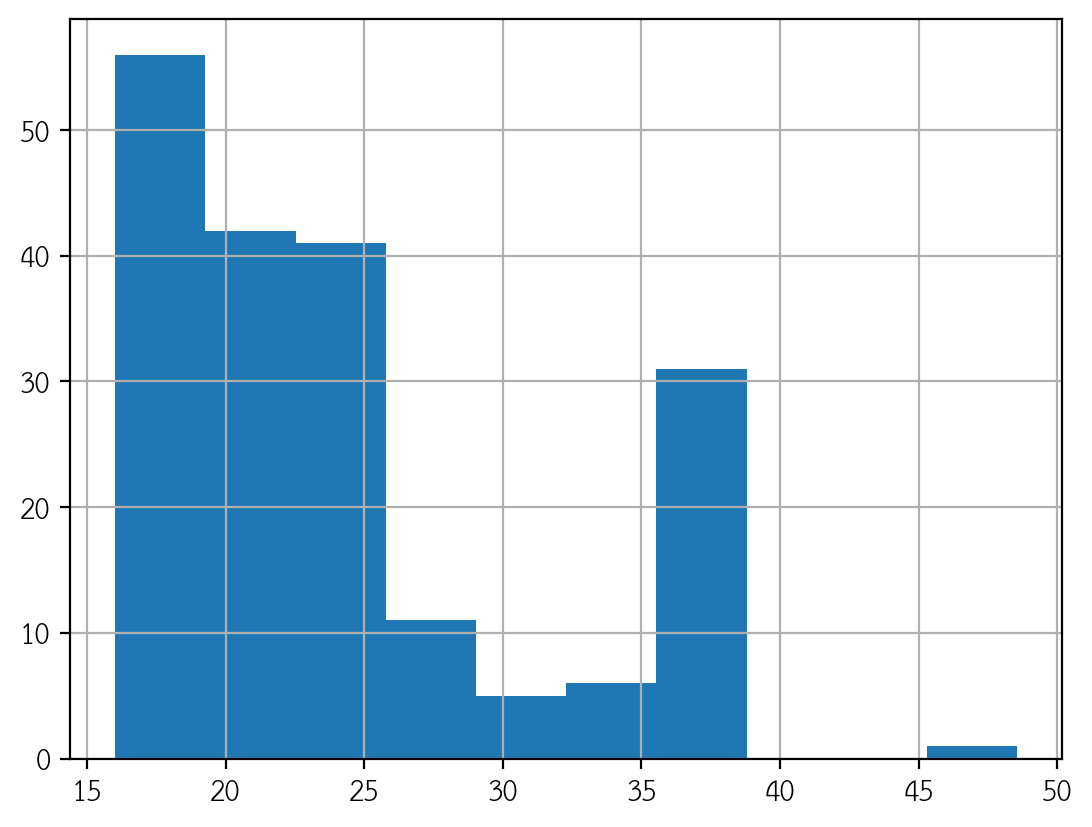

In [73]:
data.BMI.hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

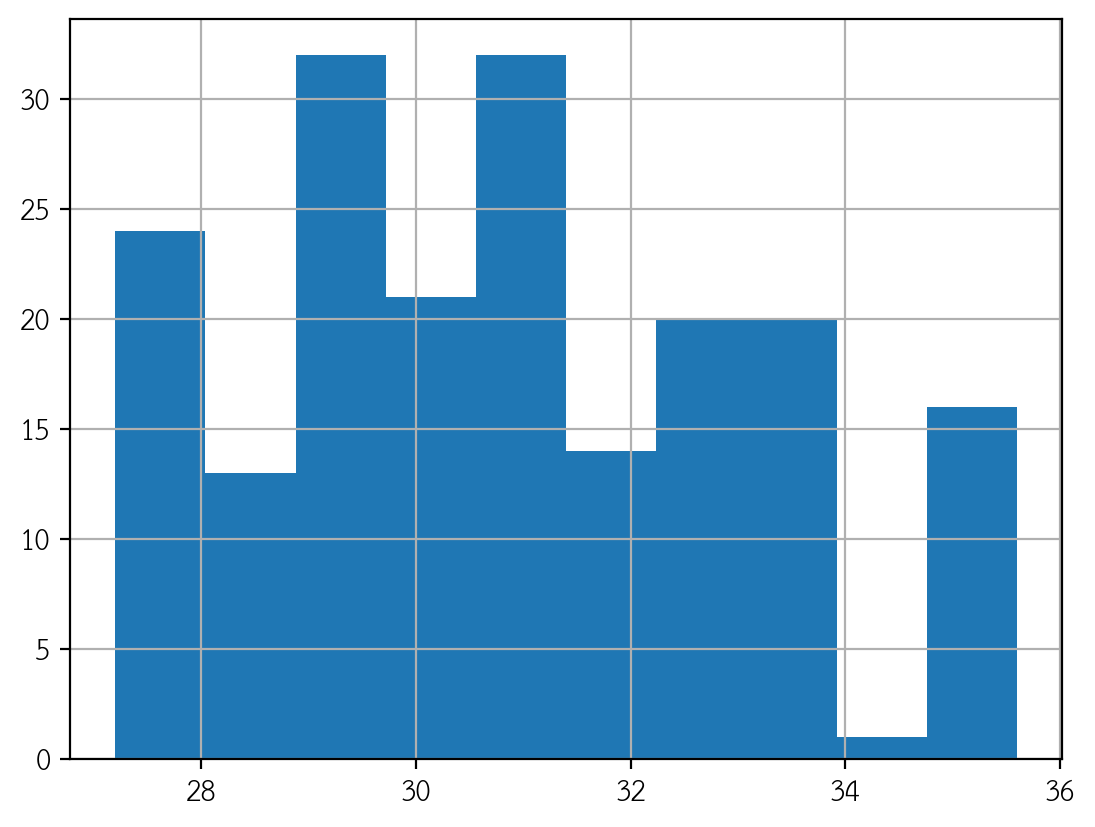

In [75]:
data.Temp.hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

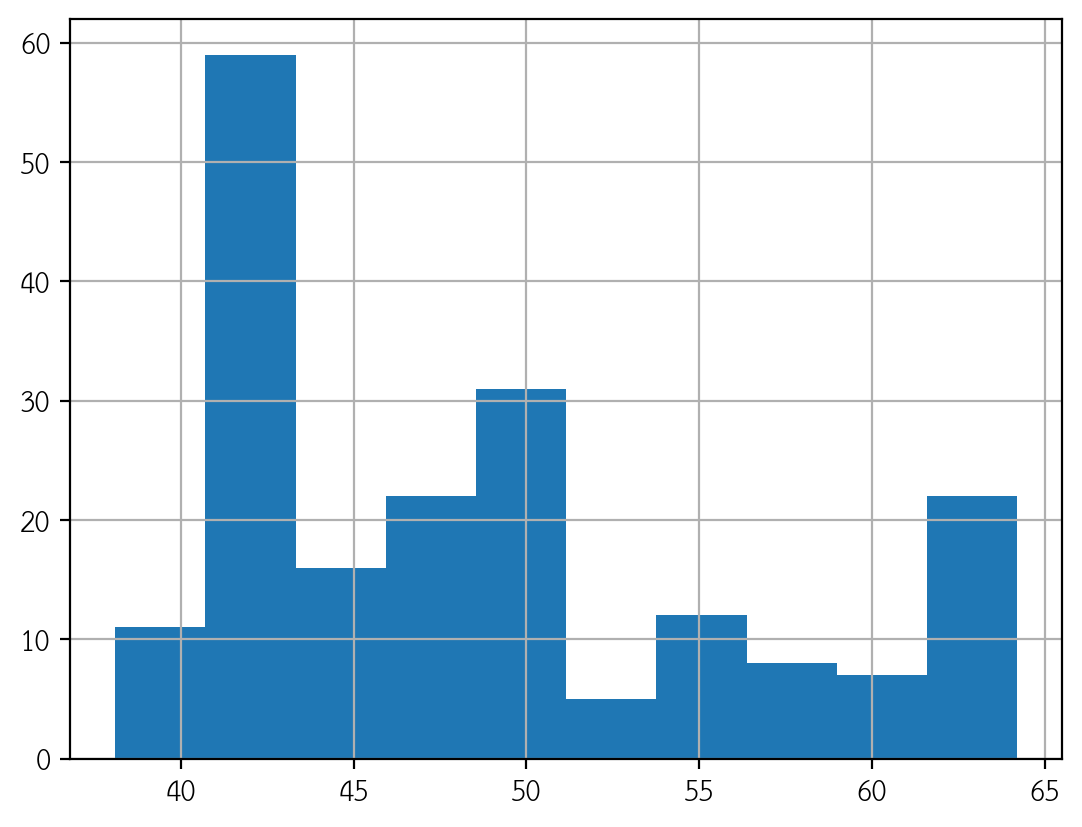

In [76]:
data.RH.hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

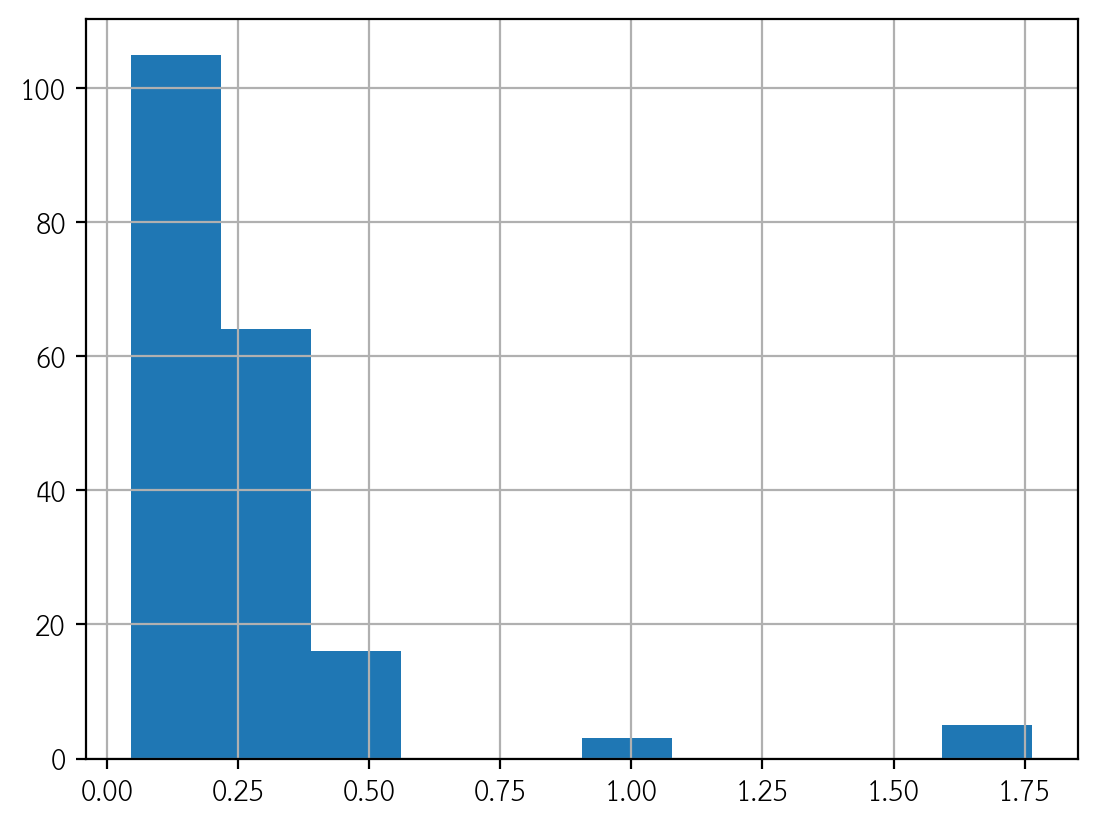

In [77]:
data.V.hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

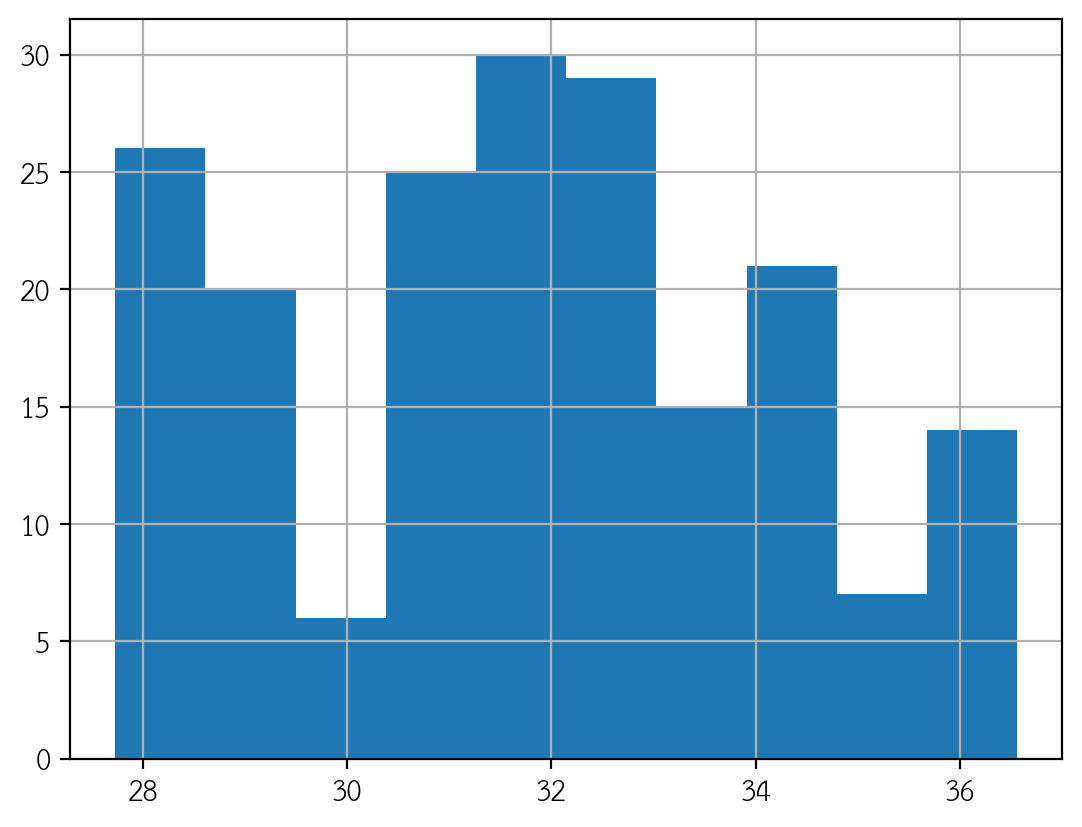

In [78]:
data.TMRT.hist()

#แบ่งกลุ่มข้อมูล

In [135]:
def convert_to_buckets(Age):
    if Age < 25:
          return 'วัยรุ่น'
    elif Age < 45:
          return 'วัยทำงาน'
    else:
        return 'คนแก่'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
data['age_cat']=data['Age'].map(convert_to_buckets)
data['age_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


วัยทำงาน    121
วัยรุ่น      46
คนแก่        26
Name: age_cat, dtype: int64

In [137]:
def convert_to_buckets(Weight):
    if Weight < 70:
          return 'น้ำหนักปานกลาง'
    elif Weight < 100:
          return 'น้ำหนักเยอะ'
    elif Weight < 130:
          return 'น้ำหนักเยอะมาก'
    else:
        return 'น้ำหนักเยอะที่สุด'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [138]:
data['weight_cat']=data['Weight'].map(convert_to_buckets)
data['weight_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


น้ำหนักปานกลาง       119
น้ำหนักเยอะ           54
น้ำหนักเยอะมาก        19
น้ำหนักเยอะที่สุด      1
Name: weight_cat, dtype: int64

In [139]:
def convert_to_buckets(V):
    if V < 0.60:
          return 'ลมน้อย'
    elif V< 1.10:
          return 'ลมปานกลาง'
    else:
        return 'ลมแรง'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
data['v_cat']=data['V'].map(convert_to_buckets)
data['v_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ลมน้อย       185
ลมแรง          5
ลมปานกลาง      3
Name: v_cat, dtype: int64

In [141]:
def convert_to_buckets(Height):
    if Height < 130:
          return 'เตี้ย'
    elif Height < 160:
          return 'สูงปานกลาง'
    else:
        return 'สูง'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [142]:
data['height_cat']=data['Height'].map(convert_to_buckets)
data['height_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


สูง           144
สูงปานกลาง     49
Name: height_cat, dtype: int64

In [143]:
def convert_to_buckets(RH):
    if RH < 45:
          return 'ความชื้นน้อย'
    elif RH < 55:
          return 'ความชื้นปานกลาง'
    else:
        return 'ความชื้นมาก'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [144]:
data['rh_cat']=data['RH'].map(convert_to_buckets)
data['rh_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ความชื้นน้อย       86
ความชื้นปานกลาง    58
ความชื้นมาก        49
Name: rh_cat, dtype: int64

In [145]:
def convert_to_buckets(TMRT):
    if TMRT < 30:
          return 'TMRTต่ำ'
    else:
        return  'TMRTสูง'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
data['tmrt_cat']=data['TMRT'].map(convert_to_buckets)
data['tmrt_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TMRTสูง    147
TMRTต่ำ     46
Name: tmrt_cat, dtype: int64

In [147]:
def convert_to_buckets(BMI):
    if BMI < 30:
          return 'สมส่วน'
    elif BMI < 45:
          return 'อ้วน'
    else:
        return 'อ้วนมาก'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [148]:
data['bmi_cat']= data['BMI'].map(convert_to_buckets)
data['bmi_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


สมส่วน     153
อ้วน        39
อ้วนมาก      1
Name: bmi_cat, dtype: int64

In [149]:
def convert_to_buckets(Temp):
    if Temp < 30:
          return 'อากาศเย็น'
    else:
        return  'อากาศร้อน'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [150]:
data['temp_cat']=data['Temp'].map(convert_to_buckets)
data['temp_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


อากาศร้อน    121
อากาศเย็น     72
Name: temp_cat, dtype: int64

#Association Rules

In [151]:
!pip install apyori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [152]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [153]:
from mlxtend.frequent_patterns import apriori, association_rules
import apyori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   No                      193 non-null    int64         
 1   Date                    193 non-null    datetime64[ns]
 2   เพศ                     193 non-null    object        
 3   Age                     193 non-null    int64         
 4   Weight                  193 non-null    float64       
 5   Height                  193 non-null    float64       
 6   BMI                     193 non-null    float64       
 7   พื้นที่ทำแบบสอบถาม      193 non-null    object        
 8   เวลา                    193 non-null    object        
 9   Temp                    193 non-null    float64       
 10  Globe temp              193 non-null    float64       
 11  RH                      193 non-null    float64       
 12  V                       193 non-null    float64   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [155]:
cols = ['age_cat','weight_cat','height_cat', 'bmi_cat', 'temp_cat','rh_cat','tmrt_cat','v_cat','Thermal_acceptance']
in_df = data[cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [156]:
in_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_cat,weight_cat,height_cat,bmi_cat,temp_cat,rh_cat,tmrt_cat,v_cat,Thermal_acceptance
0,วัยทำงาน,น้ำหนักปานกลาง,สูง,สมส่วน,อากาศร้อน,ความชื้นน้อย,TMRTสูง,ลมน้อย,Accept
1,วัยทำงาน,น้ำหนักเยอะ,สูง,สมส่วน,อากาศร้อน,ความชื้นน้อย,TMRTสูง,ลมน้อย,Accept
2,วัยทำงาน,น้ำหนักเยอะ,สูงปานกลาง,อ้วน,อากาศร้อน,ความชื้นน้อย,TMRTสูง,ลมน้อย,Accept
3,วัยทำงาน,น้ำหนักเยอะ,สูง,สมส่วน,อากาศร้อน,ความชื้นน้อย,TMRTสูง,ลมน้อย,Accept
4,วัยทำงาน,น้ำหนักเยอะมาก,สูง,อ้วน,อากาศร้อน,ความชื้นน้อย,TMRTสูง,ลมน้อย,Accept


In [157]:
dataset = []
for i in range(0, in_df.shape[0]-1):
    dataset.append([str(in_df.values[i,j]) for j in range(0, in_df.shape[1])])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [158]:
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Accept,TMRTต่ำ,TMRTสูง,Unaccept,คนแก่,ความชื้นน้อย,ความชื้นปานกลาง,ความชื้นมาก,น้ำหนักปานกลาง,น้ำหนักเยอะ,...,ลมแรง,วัยทำงาน,วัยรุ่น,สมส่วน,สูง,สูงปานกลาง,อากาศร้อน,อากาศเย็น,อ้วน,อ้วนมาก
0,True,False,True,False,False,True,False,False,True,False,...,False,True,False,True,True,False,True,False,False,False
1,True,False,True,False,False,True,False,False,False,True,...,False,True,False,True,True,False,True,False,False,False
2,True,False,True,False,False,True,False,False,False,True,...,False,True,False,False,False,True,True,False,True,False
3,True,False,True,False,False,True,False,False,False,True,...,False,True,False,True,True,False,True,False,False,False
4,True,False,True,False,False,True,False,False,False,False,...,False,True,False,False,True,False,True,False,True,False


##mini sup

In [159]:
output = apriori(df, min_support=0.2, use_colnames=oht.columns_)
output.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.239583,(TMRTต่ำ)
2,0.760417,(TMRTสูง)
3,0.447917,(ความชื้นน้อย)
4,0.296875,(ความชื้นปานกลาง)


In [160]:
output = apriori(df, min_support=0.3, use_colnames=True)
output.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.760417,(TMRTสูง)
2,0.447917,(ความชื้นน้อย)
3,0.614583,(น้ำหนักปานกลาง)
4,0.958333,(ลมน้อย)


In [161]:
output = apriori(df, min_support=0.4, use_colnames=True)
output.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.760417,(TMRTสูง)
2,0.447917,(ความชื้นน้อย)
3,0.614583,(น้ำหนักปานกลาง)
4,0.958333,(ลมน้อย)


In [162]:
output = apriori(df, min_support=0.5, use_colnames=True)
output.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.760417,(TMRTสูง)
2,0.614583,(น้ำหนักปานกลาง)
3,0.958333,(ลมน้อย)
4,0.630208,(วัยทำงาน)


In [163]:
output = apriori(df, min_support=0.6, use_colnames=True)
output.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.760417,(TMRTสูง)
2,0.614583,(น้ำหนักปานกลาง)
3,0.958333,(ลมน้อย)
4,0.630208,(วัยทำงาน)


In [164]:
output = apriori(df, min_support=0.7, use_colnames=True)
output.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.760417,(TMRTสูง)
2,0.958333,(ลมน้อย)
3,0.791667,(สมส่วน)
4,0.750000,(สูง)


## mini conf

In [165]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf3 = association_rules(output, metric = "confidence", min_threshold = 0.3)
frequent_conf3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(ลมน้อย),0.890625,0.958333,0.848958,0.953216,0.994661,-0.004557,0.890625,-0.046784
1,(ลมน้อย),(Accept),0.958333,0.890625,0.848958,0.885870,0.994661,-0.004557,0.958333,-0.114130
2,(ลมน้อย),(TMRTสูง),0.958333,0.760417,0.744792,0.777174,1.022037,0.016059,1.075203,0.517483
3,(TMRTสูง),(ลมน้อย),0.760417,0.958333,0.744792,0.979452,1.022037,0.016059,2.027778,0.089997
4,(สมส่วน),(ลมน้อย),0.791667,0.958333,0.760417,0.960526,1.002288,0.001736,1.055556,0.010959
5,(ลมน้อย),(สมส่วน),0.958333,0.791667,0.760417,0.793478,1.002288,0.001736,1.008772,0.054795
6,(ลมน้อย),(สูง),0.958333,0.750000,0.718750,0.750000,1.000000,0.000000,1.000000,0.000000
7,(สูง),(ลมน้อย),0.750000,0.958333,0.718750,0.958333,1.000000,0.000000,1.000000,0.000000


In [166]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf4 = association_rules(output, metric = "confidence", min_threshold = 0.4)
frequent_conf4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(ลมน้อย),0.890625,0.958333,0.848958,0.953216,0.994661,-0.004557,0.890625,-0.046784
1,(ลมน้อย),(Accept),0.958333,0.890625,0.848958,0.885870,0.994661,-0.004557,0.958333,-0.114130
2,(ลมน้อย),(TMRTสูง),0.958333,0.760417,0.744792,0.777174,1.022037,0.016059,1.075203,0.517483
3,(TMRTสูง),(ลมน้อย),0.760417,0.958333,0.744792,0.979452,1.022037,0.016059,2.027778,0.089997
4,(สมส่วน),(ลมน้อย),0.791667,0.958333,0.760417,0.960526,1.002288,0.001736,1.055556,0.010959
5,(ลมน้อย),(สมส่วน),0.958333,0.791667,0.760417,0.793478,1.002288,0.001736,1.008772,0.054795
6,(ลมน้อย),(สูง),0.958333,0.750000,0.718750,0.750000,1.000000,0.000000,1.000000,0.000000
7,(สูง),(ลมน้อย),0.750000,0.958333,0.718750,0.958333,1.000000,0.000000,1.000000,0.000000


In [167]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf5 = association_rules(output, metric = "confidence", min_threshold = 0.5)
frequent_conf5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(ลมน้อย),0.890625,0.958333,0.848958,0.953216,0.994661,-0.004557,0.890625,-0.046784
1,(ลมน้อย),(Accept),0.958333,0.890625,0.848958,0.885870,0.994661,-0.004557,0.958333,-0.114130
2,(ลมน้อย),(TMRTสูง),0.958333,0.760417,0.744792,0.777174,1.022037,0.016059,1.075203,0.517483
3,(TMRTสูง),(ลมน้อย),0.760417,0.958333,0.744792,0.979452,1.022037,0.016059,2.027778,0.089997
4,(สมส่วน),(ลมน้อย),0.791667,0.958333,0.760417,0.960526,1.002288,0.001736,1.055556,0.010959
5,(ลมน้อย),(สมส่วน),0.958333,0.791667,0.760417,0.793478,1.002288,0.001736,1.008772,0.054795
6,(ลมน้อย),(สูง),0.958333,0.750000,0.718750,0.750000,1.000000,0.000000,1.000000,0.000000
7,(สูง),(ลมน้อย),0.750000,0.958333,0.718750,0.958333,1.000000,0.000000,1.000000,0.000000


In [168]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf6 = association_rules(output, metric = "confidence", min_threshold = 0.6)
frequent_conf6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(ลมน้อย),0.890625,0.958333,0.848958,0.953216,0.994661,-0.004557,0.890625,-0.046784
1,(ลมน้อย),(Accept),0.958333,0.890625,0.848958,0.885870,0.994661,-0.004557,0.958333,-0.114130
2,(ลมน้อย),(TMRTสูง),0.958333,0.760417,0.744792,0.777174,1.022037,0.016059,1.075203,0.517483
3,(TMRTสูง),(ลมน้อย),0.760417,0.958333,0.744792,0.979452,1.022037,0.016059,2.027778,0.089997
4,(สมส่วน),(ลมน้อย),0.791667,0.958333,0.760417,0.960526,1.002288,0.001736,1.055556,0.010959
5,(ลมน้อย),(สมส่วน),0.958333,0.791667,0.760417,0.793478,1.002288,0.001736,1.008772,0.054795
6,(ลมน้อย),(สูง),0.958333,0.750000,0.718750,0.750000,1.000000,0.000000,1.000000,0.000000
7,(สูง),(ลมน้อย),0.750000,0.958333,0.718750,0.958333,1.000000,0.000000,1.000000,0.000000


In [169]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf7 = association_rules(output, metric = "confidence", min_threshold = 0.7)
frequent_conf7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(ลมน้อย),0.890625,0.958333,0.848958,0.953216,0.994661,-0.004557,0.890625,-0.046784
1,(ลมน้อย),(Accept),0.958333,0.890625,0.848958,0.885870,0.994661,-0.004557,0.958333,-0.114130
2,(ลมน้อย),(TMRTสูง),0.958333,0.760417,0.744792,0.777174,1.022037,0.016059,1.075203,0.517483
3,(TMRTสูง),(ลมน้อย),0.760417,0.958333,0.744792,0.979452,1.022037,0.016059,2.027778,0.089997
4,(สมส่วน),(ลมน้อย),0.791667,0.958333,0.760417,0.960526,1.002288,0.001736,1.055556,0.010959
5,(ลมน้อย),(สมส่วน),0.958333,0.791667,0.760417,0.793478,1.002288,0.001736,1.008772,0.054795
6,(ลมน้อย),(สูง),0.958333,0.750000,0.718750,0.750000,1.000000,0.000000,1.000000,0.000000
7,(สูง),(ลมน้อย),0.750000,0.958333,0.718750,0.958333,1.000000,0.000000,1.000000,0.000000


In [170]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf8 = association_rules(output, metric = "confidence", min_threshold = 0.8)
frequent_conf8

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(ลมน้อย),0.890625,0.958333,0.848958,0.953216,0.994661,-0.004557,0.890625,-0.046784
1,(ลมน้อย),(Accept),0.958333,0.890625,0.848958,0.885870,0.994661,-0.004557,0.958333,-0.114130
2,(TMRTสูง),(ลมน้อย),0.760417,0.958333,0.744792,0.979452,1.022037,0.016059,2.027778,0.089997
3,(สมส่วน),(ลมน้อย),0.791667,0.958333,0.760417,0.960526,1.002288,0.001736,1.055556,0.010959
4,(สูง),(ลมน้อย),0.750000,0.958333,0.718750,0.958333,1.000000,0.000000,1.000000,0.000000


#หากบริเวณที่อยู่มีลมน้อยผู้คนยังคงยอมรับสภาพอากาศ

#one hot encoder

In [ ]:
data.drop(['Date','เวลา'], axis=1, inplace=True)

In [ ]:
data['Thermal_acceptance'] = pd.factorize(data['Thermal_acceptance'])[0].astype(np.uint16)
data

,No,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,Temp,Globe temp,RH,...,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met,seasons
0,1,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,...,2,0,-1,0,-1,0,30.628551,0.55,1.2,winter
1,2,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,...,1,0,0,1,-1,0,30.628551,0.55,1.2,winter
2,3,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,...,1,0,0,0,0,0,30.628551,0.55,1.2,winter
3,4,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,...,2,-1,0,0,-1,1,30.628551,0.55,1.2,winter
4,5,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,...,0,-1,-1,0,-1,0,30.628551,0.55,1.2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,35.6,36.2,46.5,...,2,-1,1,0,-1,-1,36.559615,0.55,1.2,summer
189,190,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,35.6,36.2,46.5,...,4,-1,1,1,-1,-1,36.559615,0.55,1.2,summer
190,191,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,35.6,36.2,46.5,...,3,-1,-1,1,-1,-1,36.559615,0.55,1.2,summer
191,192,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,35.6,36.2,46.5,...,3,-1,1,1,-1,-1,36.559615,0.55,1.2,summer


In [ ]:
data['Thermal_acceptance'] = data.Thermal_acceptance.astype('category').cat.codes
data

,No,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,Temp,Globe temp,RH,...,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met,seasons
0,1,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,...,2,0,-1,0,-1,0,30.628551,0.55,1.2,winter
1,2,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,...,1,0,0,1,-1,0,30.628551,0.55,1.2,winter
2,3,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,...,1,0,0,0,0,0,30.628551,0.55,1.2,winter
3,4,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,...,2,-1,0,0,-1,1,30.628551,0.55,1.2,winter
4,5,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,...,0,-1,-1,0,-1,0,30.628551,0.55,1.2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,35.6,36.2,46.5,...,2,-1,1,0,-1,-1,36.559615,0.55,1.2,summer
189,190,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,35.6,36.2,46.5,...,4,-1,1,1,-1,-1,36.559615,0.55,1.2,summer
190,191,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,35.6,36.2,46.5,...,3,-1,-1,1,-1,-1,36.559615,0.55,1.2,summer
191,192,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,35.6,36.2,46.5,...,3,-1,1,1,-1,-1,36.559615,0.55,1.2,summer


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      193 non-null    int64  
 1   เพศ                     193 non-null    object 
 2   Age                     193 non-null    int64  
 3   Weight                  193 non-null    float64
 4   Height                  193 non-null    float64
 5   BMI                     193 non-null    float64
 6   พื้นที่ทำแบบสอบถาม      193 non-null    object 
 7   Temp                    193 non-null    float64
 8   Globe temp              193 non-null    float64
 9   RH                      193 non-null    float64
 10  V                       193 non-null    float64
 11  Thermal_acceptance      193 non-null    int8   
 12  Thermal_sensation_Vote  193 non-null    int64  
 13  อุณหภูมิ                193 non-null    int64  
 14  ความชื้น                193 non-null    in

In [ ]:
# Perform one-hot encoding on the categorical variables
categorical_columns = ['เพศ','พื้นที่ทำแบบสอบถาม','seasons']
df_encoded = pd.get_dummies(data, columns=categorical_columns)
# Drop the 'No' column
df_encoded = df_encoded.drop(['Globe temp', 'No'], axis=1)


In [ ]:
df_encoded

,Age,Weight,Height,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,อุณหภูมิ,...,Clo,Met,เพศ_ชาย,เพศ_หญิง,พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง,พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม,พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร,seasons_summer,seasons_winter
0,27,49.0,169.0,17.156262,30.5,42.9,0.13,0,0,2,...,0.55,1.2,1,0,0,0,1,0,0,1
1,36,71.0,175.0,23.183673,30.5,42.9,0.13,0,-1,3,...,0.55,1.2,1,0,0,0,1,0,0,1
2,25,89.0,153.0,38.019565,30.5,42.9,0.13,0,-1,2,...,0.55,1.2,0,1,0,0,1,0,0,1
3,29,75.0,165.0,27.548209,30.5,42.9,0.13,0,-1,3,...,0.55,1.2,1,0,0,0,1,0,0,1
4,28,118.0,187.0,33.744173,30.5,42.9,0.13,0,-1,2,...,0.55,1.2,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,88.0,180.0,27.160494,35.6,46.5,0.40,0,0,3,...,0.55,1.2,1,0,0,0,0,1,1,0
189,23,47.0,159.0,18.591037,35.6,46.5,0.40,1,0,3,...,0.55,1.2,0,1,0,0,0,1,1,0
190,27,47.0,169.0,16.456006,35.6,46.5,0.40,0,1,4,...,0.55,1.2,1,0,0,0,0,1,1,0
191,57,68.0,171.0,23.255019,35.6,46.5,0.40,0,1,3,...,0.55,1.2,1,0,0,0,0,1,1,0



























#Spitt data

In [ ]:
df_encoded.head()

,Age,Weight,Height,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,อุณหภูมิ,...,Clo,Met,เพศ_ชาย,เพศ_หญิง,พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง,พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม,พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร,seasons_summer,seasons_winter
0,27,49.0,169.0,17.156262,30.5,42.9,0 - 0.60,0,0,2,...,0.55,1.2,1,0,0,0,1,0,0,1
1,36,71.0,175.0,23.183673,30.5,42.9,0 - 0.60,0,-1,3,...,0.55,1.2,1,0,0,0,1,0,0,1
2,25,89.0,153.0,38.019565,30.5,42.9,0 - 0.60,0,-1,2,...,0.55,1.2,0,1,0,0,1,0,0,1
3,29,75.0,165.0,27.548209,30.5,42.9,0 - 0.60,0,-1,3,...,0.55,1.2,1,0,0,0,1,0,0,1
4,28,118.0,187.0,33.744173,30.5,42.9,0 - 0.60,0,-1,2,...,0.55,1.2,1,0,0,0,1,0,0,1


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      193 non-null    int64  
 1   Weight                                   193 non-null    float64
 2   Height                                   193 non-null    float64
 3   BMI                                      193 non-null    float64
 4   Temp                                     193 non-null    float64
 5   %RH                                      193 non-null    float64
 6   V (m/s)                                  193 non-null    float64
 7   Thermal_acceptance                       193 non-null    int8   
 8   Thermal_sensation_Vote                   193 non-null    int64  
 9   อุณหภูมิ                                 193 non-null    int64  
 10  ความชื้น                                 193 non-n

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
#features = df_encoded.drop(['Thermal_acceptance', 'Thermal_sensation_Vote'], axis=1)
#labels = df_encoded['Thermal_acceptance']
#df = pd.DataFrame(data = {"X": features, "Y": labels})

ValueError: ignored

In [ ]:
#k = 5  # ตัวอย่างการใช้ K = 5

# สร้างวัตถุ KFold
#kf = KFold(n_splits=k, shuffle=True, random_state=42)

# ใช้ K-fold cross-validation เพื่อแบ่งข้อมูล
#for train_index, test_index in kf.split( df_encoded):
    #train_data, test_data =  df_encoded.iloc[train_index],  df_encoded.iloc[test_index]

    # ทำสิ่งที่คุณต้องการบนชุดฝึก (train_data) และชุดทดสอบ (test_data)
    # ในที่นี้คุณสามารถฝึกแบบจำลอง, ทดสอบ, หรือประเมินประสิธิภาพของแบบจำลอง

    # ตัวอย่าง: แสดงข้อมูลตัวอย่าง
    #print("Train Data:")
    #print(train_data.head())
    #print("Test Data:")
    #print(test_data.head())

Train Data:
   Age  Weight  Height        BMI  Temp  Globe temp   %RH  V (m/s)  \
0   27    49.0   169.0  17.156262  30.5        30.6  42.9     0.13   
1   36    71.0   175.0  23.183673  30.5        30.6  42.9     0.13   
2   25    89.0   153.0  38.019565  30.5        30.6  42.9     0.13   
3   29    75.0   165.0  27.548209  30.5        30.6  42.9     0.13   
4   28   118.0   187.0  33.744173  30.5        30.6  42.9     0.13   

   Thermal_acceptance  Thermal_sensation_Vote  ...   Clo  Met  เพศ_ชาย  \
0                   0                       0  ...  0.55  1.2        1   
1                   0                      -1  ...  0.55  1.2        1   
2                   0                      -1  ...  0.55  1.2        0   
3                   0                      -1  ...  0.55  1.2        1   
4                   0                      -1  ...  0.55  1.2        1   

   เพศ_หญิง  พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้  \
0         0                                      0   
1         0   

In [ ]:
#for train_index, test_index in kf.split(data):
    #train_data, test_data = data.iloc[train_index], data.iloc[test_index]

In [ ]:
# Define the feature matrix X and the target y

X = df_encoded.drop(['Thermal_acceptance', 'Thermal_sensation_Vote'], axis=1)
y = df_encoded['Thermal_acceptance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [ ]:
#kf = KFold(n_splits=5, random_state=42, shuffle=True) # Define the split - into 10 folds
#kf.get_n_splits(df_encoded) # returns the number of splitting iterations in the cross-validator
#print(kf)

#for train, test in kf.split(df_encoded):
    #print("TRAIN:", train)
    #print("TEST:", test)
    #X_train, X_test = df_encoded.drop(['Thermal_acceptance', 'Thermal_sensation_Vote'], axis=1)

In [ ]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 154, Test set:39
Fold:2, Train set: 154, Test set:39
Fold:3, Train set: 154, Test set:39
Fold:4, Train set: 155, Test set:38
Fold:5, Train set: 155, Test set:38


In [ ]:
#Feature Scaling by Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.14      , 0.33333333, 0.90374332, ..., 0.        , 0.        ,
        1.        ],
       [0.32      , 0.4829932 , 0.93582888, ..., 0.        , 0.        ,
        1.        ],
       [0.1       , 0.60544218, 0.81818182, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.14      , 0.31972789, 0.90374332, ..., 1.        , 1.        ,
        0.        ],
       [0.74      , 0.46258503, 0.9144385 , ..., 1.        , 1.        ,
        0.        ],
       [0.88      , 0.31972789, 0.79679144, ..., 1.        , 1.        ,
        0.        ]])

In [ ]:

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (135, 28)
Number transactions y_train dataset:  (135,)
Number transactions X_test dataset:  (58, 28)
Number transactions y_test dataset:  (58,)


In [ ]:
from imblearn.over_sampling import SMOTE
#print("Before OverSampling, counts of label '1': {}".format(sum(y_train=='Acceptance')))
#print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train=='Unacceptance')))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

#print("After OverSampling, counts of label '1': {}".format(sum(y_train_res=='Acceptance')))
#print("After OverSampling, counts of label '0': {}".format(sum(y_train_res=='Unacceptance')))

After OverSampling, the shape of train_X: (344, 28)
After OverSampling, the shape of train_y: (344,) 



In [ ]:
X_train_res.shape, y_train_res.shape

((344, 28), (344,))

In [ ]:
data['Thermal_acceptance'].value_counts()

0    172
1     21
Name: Thermal_acceptance, dtype: int64

#Standardization


In [ ]:
#data.columns

In [ ]:
#from sklearn.preprocessing import StandardScaler

In [ ]:
#x=data[cols]
#scaler=StandardScaler()
#x_t=scaler.fit_transform(x)

In [ ]:
#scaler.mean_

In [ ]:
#scaler.var_

In [ ]:
data.columns

Index(['No', 'เพศ', 'Age', 'Weight', 'Height', 'BMI', 'พื้นที่ทำแบบสอบถาม',
       'Temp', 'Globe temp', '%RH', 'V (m/s)', 'Thermal acceptance',
       'Thermal sensation Vote', 'อุณหภูมิ', 'ความชื้น', 'กระแสลม',
       'ความแรงของแสงแดด', 'เหงื่อบริเวณผิวหนัง', 'ความร้อน', 'ความชื้น.1',
       'กระแสลม.1', 'แสงแดด', 'เหงื่อบริเวณผิวหนัง.1', 'TMRT', 'Clo', 'Met',
       'seasons'],
      dtype='object')

In [ ]:
# Models Names.
c_names = ["Nearest Neighbors", "SVM Linear", "SVM RBF", "Gaussian NB", "Bernoulli NB",
            "Random Forest", "NN MLP",  "XGBC Boost"]

# Models.
#classifiers = [
    #KNeighborsClassifier(3),
    #SVC(kernel="linear", C=0.010),
    #SVC(gamma=2, C=1),
    #GaussianNB(),
    #BernoulliNB(),
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    #XGBClassifier(),

]

#Grid search v2

In [ ]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7],'criterion':['gini', 'entropy', 'log_loss']}
RF_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RF_grid.fit(X_train_res, y_train_res)
print("best_params :",RF_grid.best_params_)
print("accuracy :",RF_grid.best_score_)

best_params : {'criterion': 'gini', 'max_depth': 7, 'max_features': 6, 'min_samples_split': 6, 'n_estimators': 50}
accuracy : 0.8945865302642797


In [ ]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3],
              'n_estimators':[5,10,20,100],'subsample': [0.3, 0.5, 1]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train_res, y_train_res)
print("best_params :",xgb_grid.best_params_)
print("accuracy :",xgb_grid.best_score_)

best_params : {'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}
accuracy : 0.8769394714407502


In [ ]:
#param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
#svm_grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=0)
#svm_grid.fit(X_train_res, y_train_res)
#print("best_params :",svm_grid.best_params_)
#print("accuracy :",svm_grid.best_score_)

best_params : {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy : 0.9357203751065644


In [ ]:
param_grid = dict(
    n_neighbors=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    weights=['uniform', 'distance'],
    algorithm=['auto', 'kd_tree']
)
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, refit=True, verbose=0)
knn_grid.fit(X_train_res, y_train_res)
print("best_params :",knn_grid.best_params_)
print("accuracy :",knn_grid.best_score_)

best_params : {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}
accuracy : 0.8802216538789429


In [ ]:
#param_grid = [
   # {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
   # 'C' : np.logspace(-4, 4, 20),
    #'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    #'max_iter' : [100, 1000,2500, 5000]}]

#lr_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, refit=True, verbose=0)
#lr_grid.fit(X_train_res, y_train_res)
#print("best_params :",lr_grid.best_params_)
#print("accuracy :",lr_grid.best_score_)

Streaming output truncated to the last 5000 lines.
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Inc

#Appy Mode

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [ ]:
knn1 = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 2, weights='uniform')
knn1.fit(X_train_res, y_train_res.ravel())

KNeighborsClassifier(n_neighbors=2)

In [ ]:
model = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 2, weights='uniform')
    #scale_pos_weight=sum(y_train==0)/sum(y_train==1), # adjust class weights due to class imbalance
    #eval_metric='logloss', # use logloss to evaluate performance
    #use_label_encoder=False # to avoid warning message

# Train the model
model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[55  0]
 [ 0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00         3

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [ ]:
#model = SVC(C= 0.5, gamma= 0.001, kernel= 'poly')

# Train the model
#model.fit(X_train_res, y_train_res)

# Make predictions on the test set
#y_pred = model.predict(X_test)
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))

[[51  4]
 [ 2  1]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        55
           1       0.20      0.33      0.25         3

    accuracy                           0.90        58
   macro avg       0.58      0.63      0.60        58
weighted avg       0.92      0.90      0.91        58



In [ ]:
rf = RandomForestClassifier(max_depth= 5, max_features= 9, min_samples_split= 6, n_estimators= 100)

# Train the model
rf.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[51  4]
 [ 0  3]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        55
           1       0.43      1.00      0.60         3

    accuracy                           0.93        58
   macro avg       0.71      0.96      0.78        58
weighted avg       0.97      0.93      0.94        58



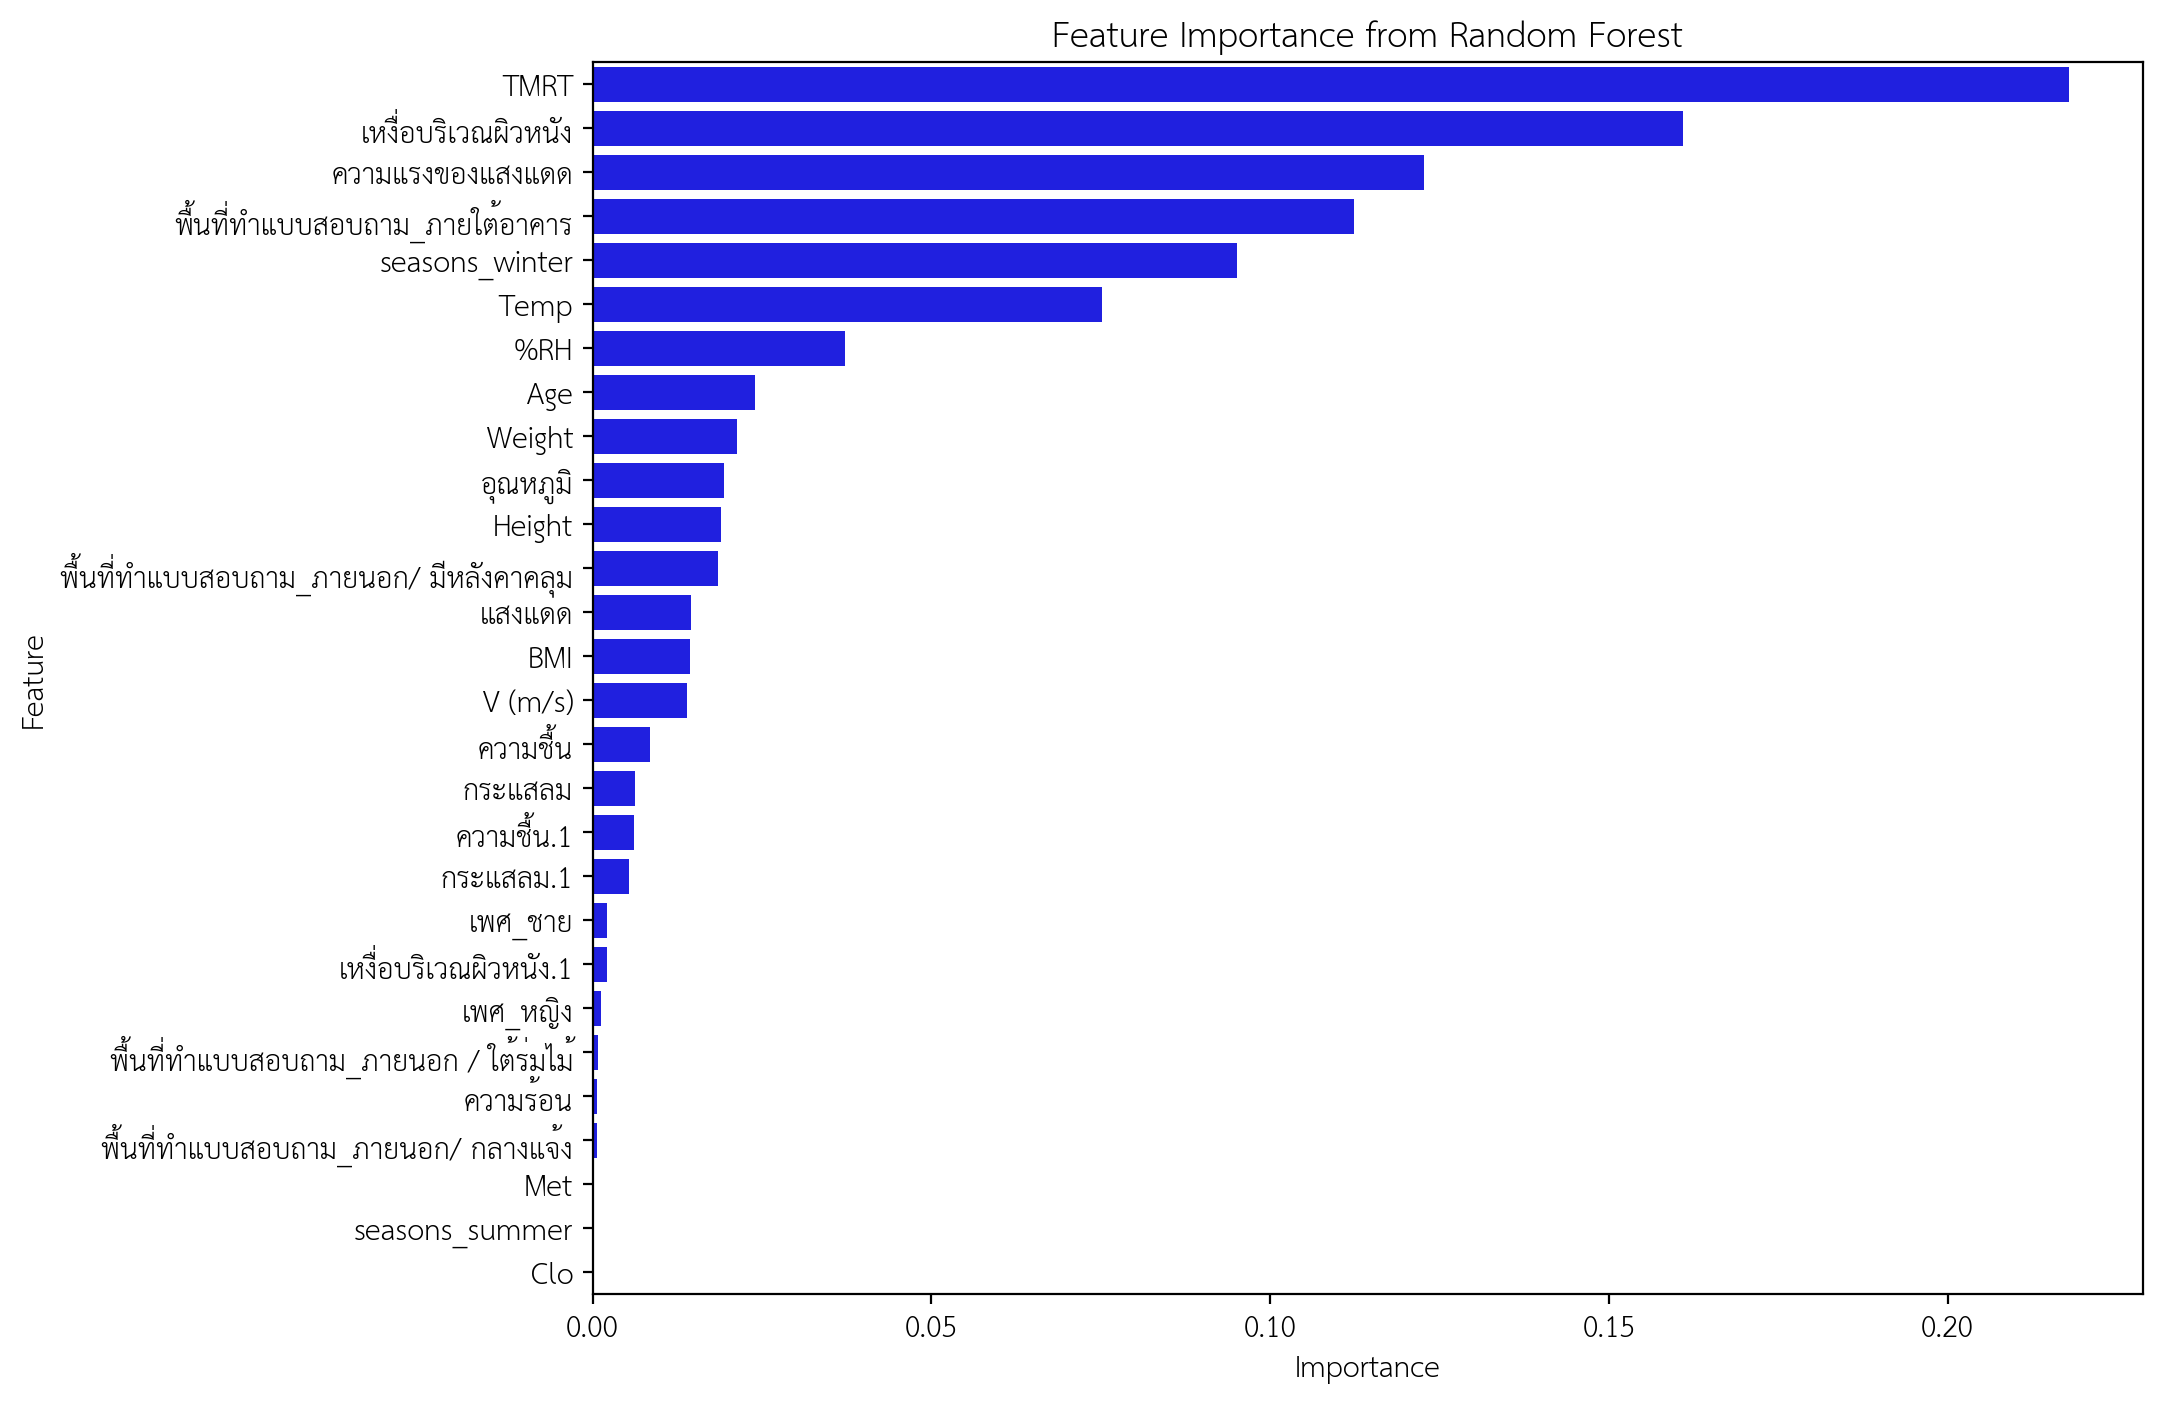

In [ ]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=importances_df, x='Importance', y='Feature', color='b')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
xgb_model = XGBClassifier(
       gamma= 0.01,
       learning_rate =0.2,
       max_depth =5,
       min_child_weight= 1,
       n_estimators =100,
       subsample= 0.3
    )
#gamma': 0.001, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100
# Train the model
xgb_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[54  1]
 [ 0  3]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.75      1.00      0.86         3

    accuracy                           0.98        58
   macro avg       0.88      0.99      0.92        58
weighted avg       0.99      0.98      0.98        58



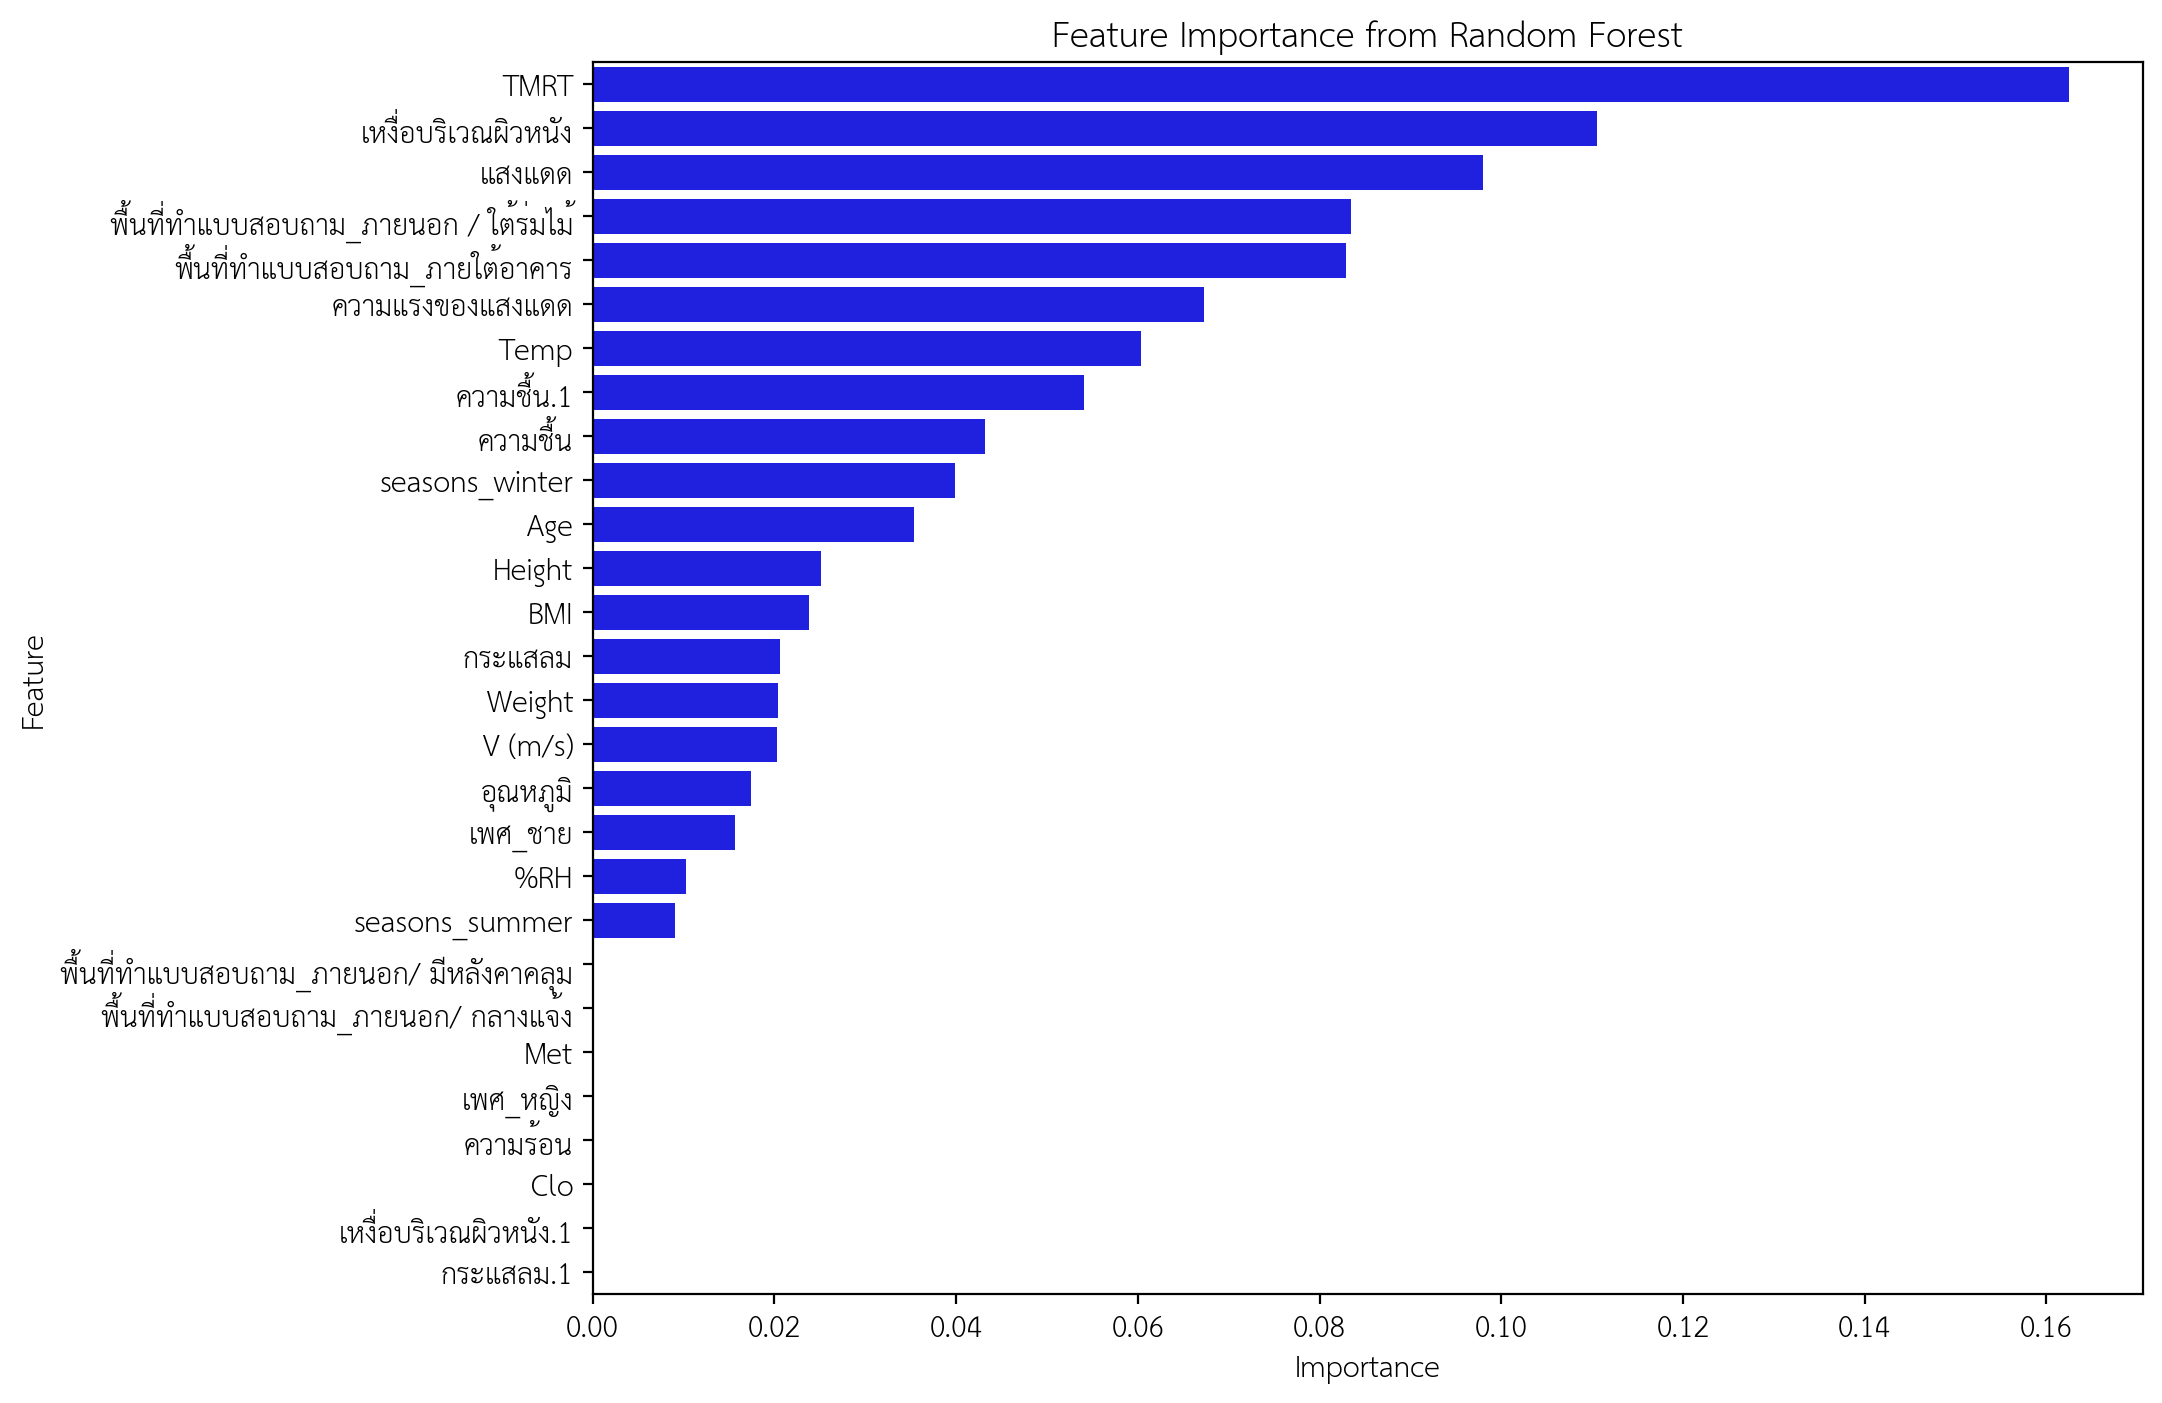

In [ ]:
# Get feature importances
feature_importances = xgb_model.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=importances_df, x='Importance', y='Feature', color='b')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Feature Importance

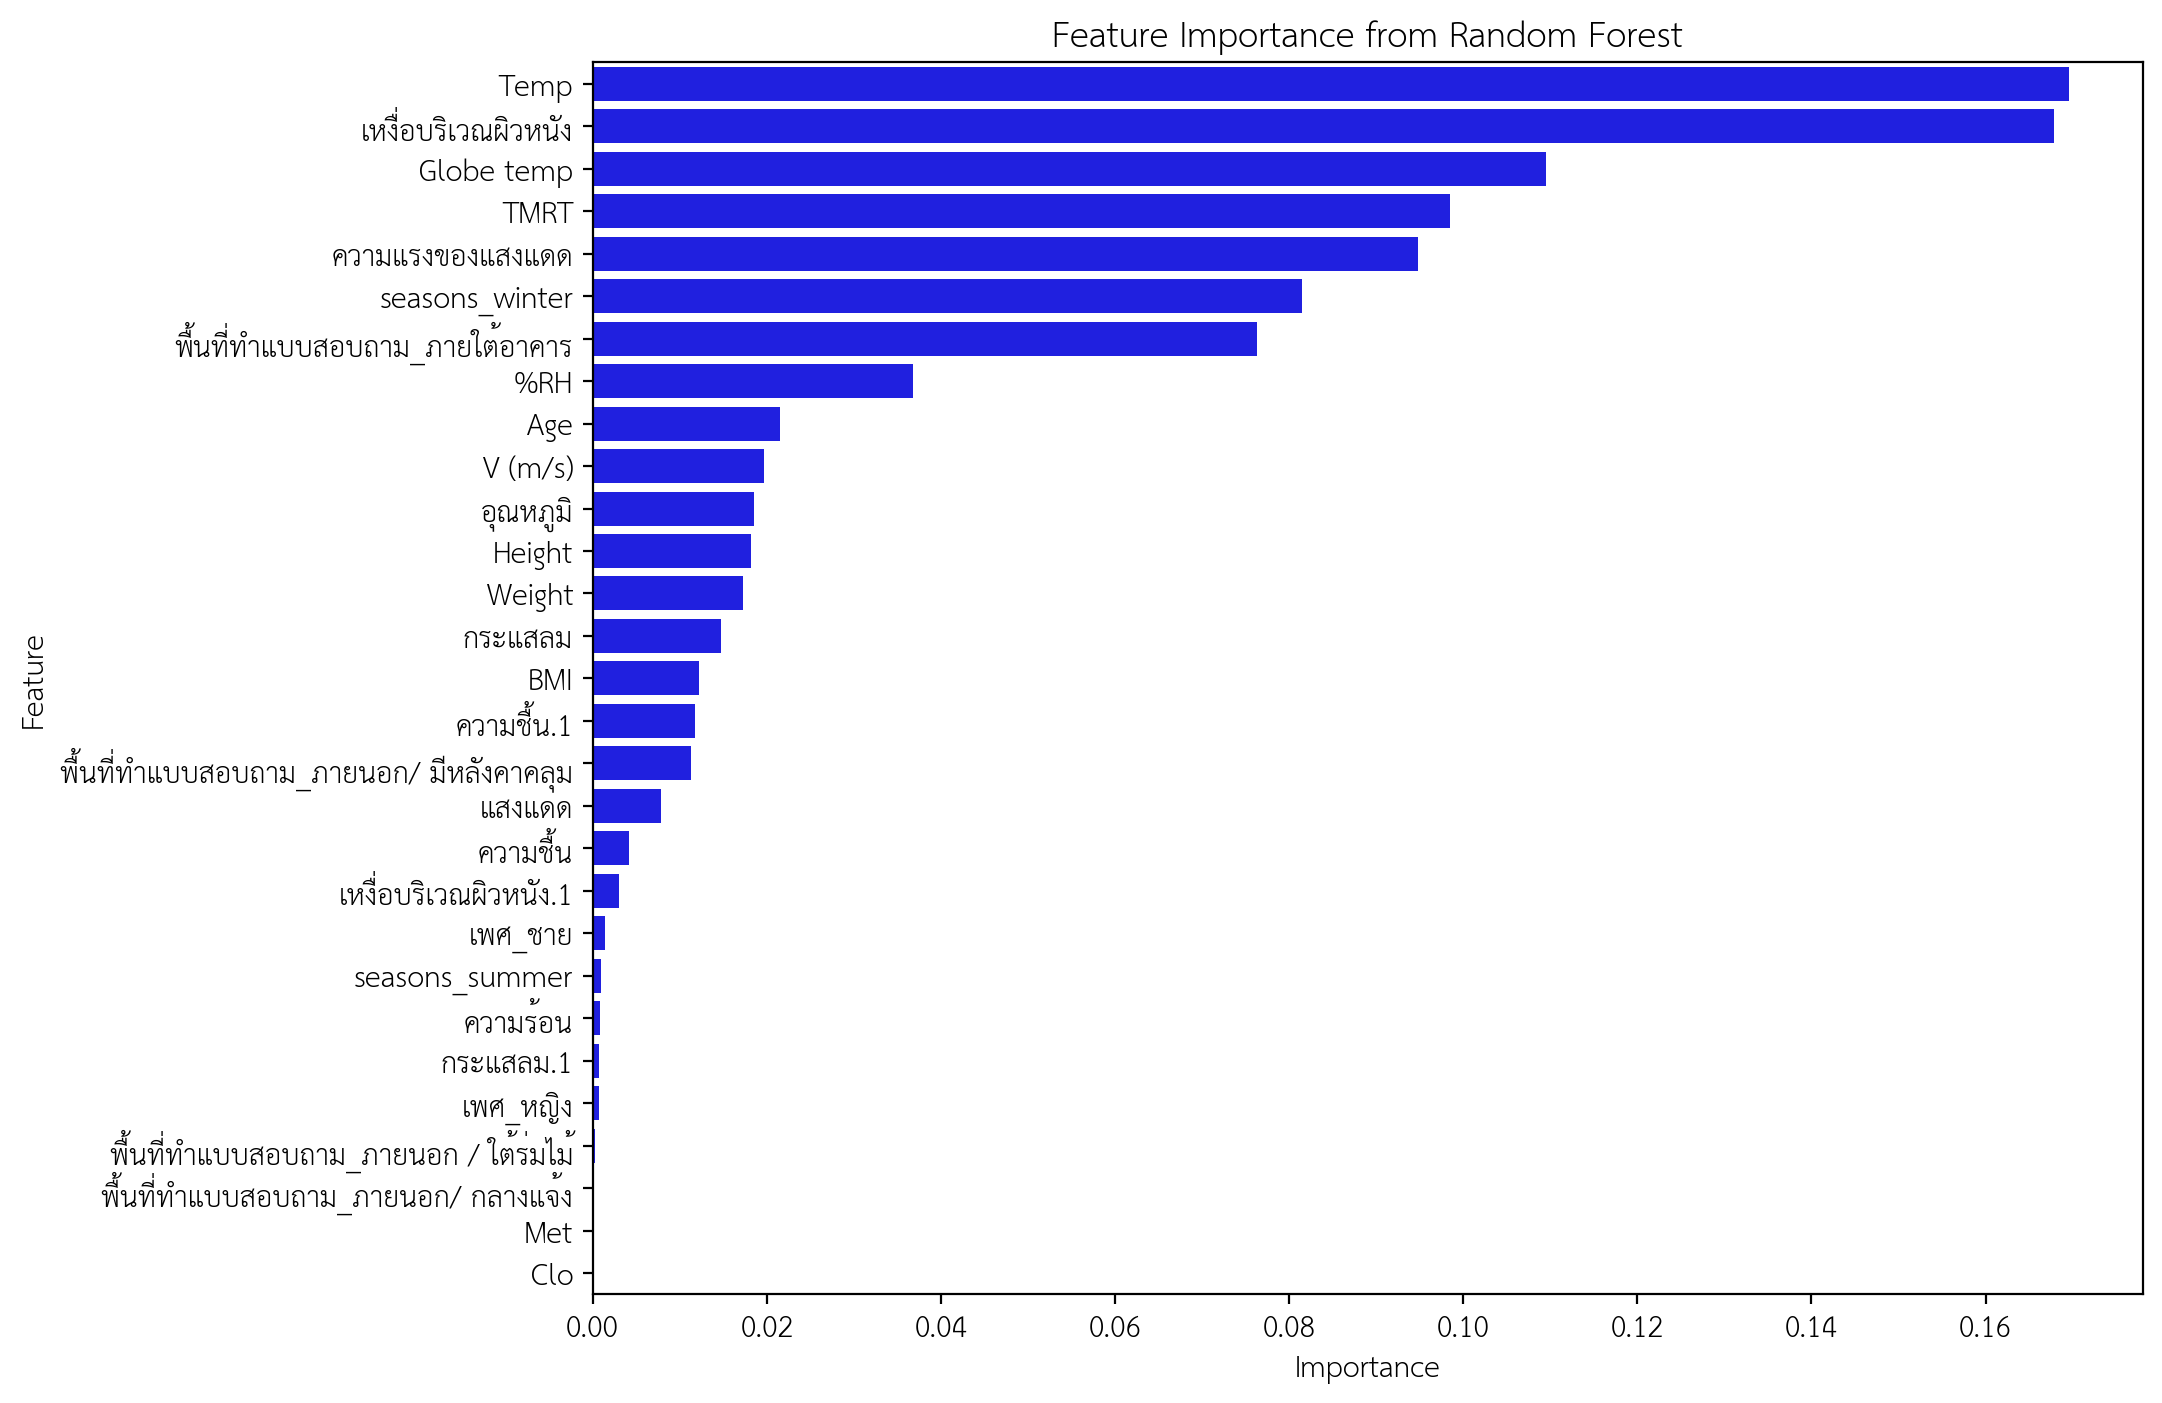

In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=importances_df, x='Importance', y='Feature', color='b')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#TSV

In [ ]:
from sklearn import svm
from sklearn import model_selection
from statsmodels.tools.eval_measures import mse

In [ ]:
# Define the feature matrix X and the target y

X2 = df_encoded.drop(['Thermal_acceptance', 'Thermal_sensation_Vote'], axis=1)
y2 = df_encoded['Thermal_sensation_Vote']

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [ ]:
#Feature Scaling by Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.14      , 0.33333333, 0.90374332, ..., 0.        , 0.        ,
        1.        ],
       [0.32      , 0.4829932 , 0.93582888, ..., 0.        , 0.        ,
        1.        ],
       [0.1       , 0.60544218, 0.81818182, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.14      , 0.31972789, 0.90374332, ..., 1.        , 1.        ,
        0.        ],
       [0.74      , 0.46258503, 0.9144385 , ..., 1.        , 1.        ,
        0.        ],
       [0.88      , 0.31972789, 0.79679144, ..., 1.        , 1.        ,
        0.        ]])

In [ ]:
h1=svm.SVR()

In [ ]:
h1.fit(X_train2,y_train2)

SVR()

In [ ]:
y_pred1=h1.predict(X_test2)

In [ ]:
print(mse(y_pred,y_test2))

1.3487150199044067


In [ ]:
result = (mse(y_pred,y_test2))

In [ ]:
result

1.3487150199044067

In [ ]:
print(y_test2)

45    -2
137    1
76     0
144    2
113    0
152    1
15     1
18     1
16     0
9      2
78     0
112    1
66    -1
65    -1
154    1
30     0
146    2
69     1
111    1
68     1
158    0
135    0
118    0
98     2
67    -1
115    0
24     1
159    0
60     1
142    0
114    1
167    0
19     2
90     0
171    3
5      1
155    3
143    1
166    0
82     0
109    2
163    0
35    -1
136    0
42    -1
183    3
101    2
55     1
75     0
126    1
29    -1
172    3
56     0
51    -1
164    2
38     0
31    -1
156    1
Name: Thermal_sensation_Vote, dtype: int64


In [ ]:
print(y_pred1)

[0.15361471 0.31769698 0.07936355 0.32567177 0.0845599  0.38971614
 0.09291441 0.12504414 0.01712253 0.23103071 0.04667651 0.1249708
 0.09472579 0.08153237 0.39081109 0.15811826 0.33681208 0.13714256
 0.16718032 0.11619529 0.35378026 0.29300949 0.12780319 0.27987883
 0.11211284 0.13630525 0.14801398 0.34346072 0.10483243 0.28850297
 0.14500258 0.2411043  0.13805029 0.12849791 0.30299017 0.22153884
 0.42166625 0.31289891 0.28323593 0.10258344 0.22916937 0.35923852
 0.12611461 0.33572814 0.03617574 0.39472653 0.19257519 0.07886107
 0.07701867 0.15681289 0.1306113  0.36112997 0.10242333 0.07206235
 0.36240985 0.14031626 0.16775994 0.40133922]


In [ ]:
x = y_pred1
Y = y_test2

<function matplotlib.pyplot.show(close=None, block=None)>

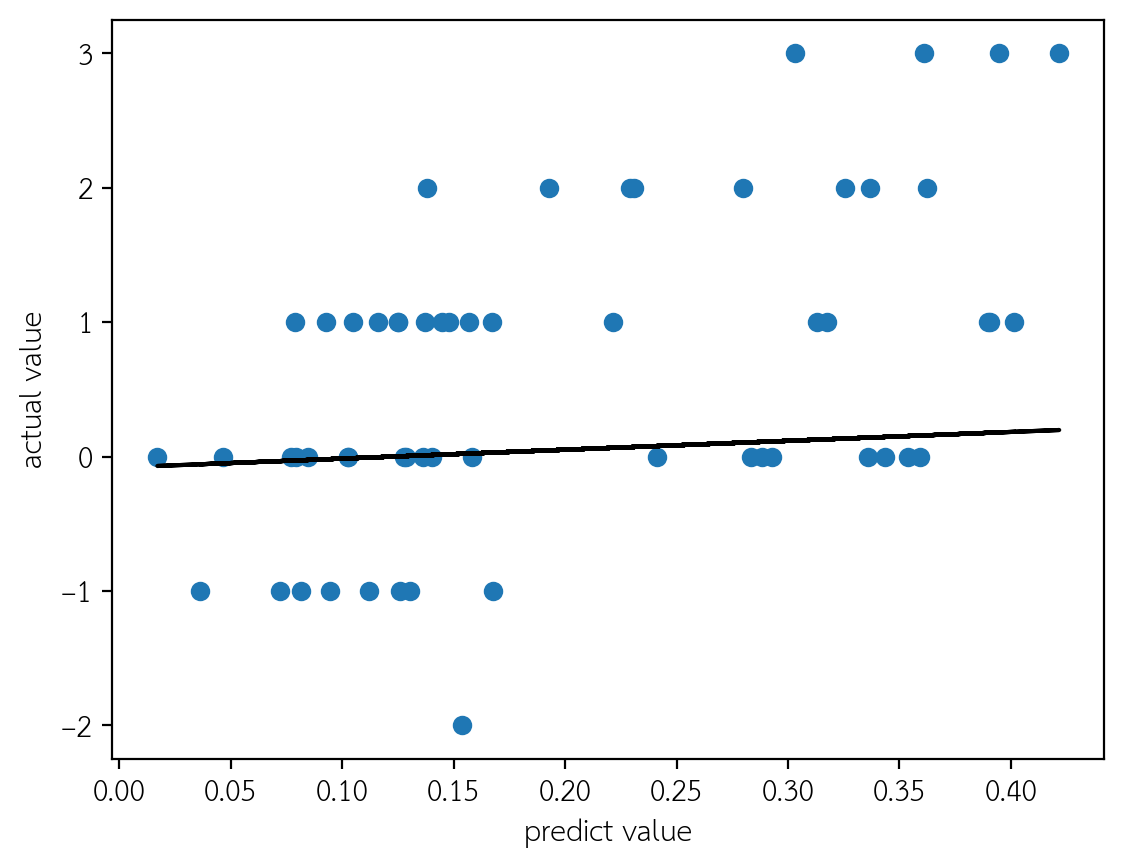

In [ ]:
plt.scatter(x, Y)
m, b = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred, m*y_pred + b, color='black', label='fit')
plt.ylabel('actual value')
plt.xlabel('predict value')
plt.show